In [2]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from math import pi,log
import matplotlib as mpl

# import basic plot tools
from qiskit.visualization import plot_histogram

## Austin's add-ons
from qiskit.quantum_info import Statevector

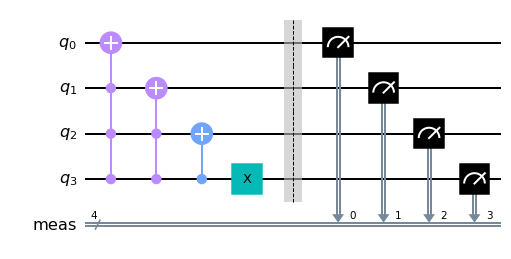

In [3]:
'''to move right, add the sqrt(n) right-most qubits'''
'''moving down the lattice is adding the left-most sqrt(n) qubits'''

def increment(n_adder):
    
    qc = QuantumCircuit(n_adder)
    
    for i in range(n_adder-2):
        qc.mcx(list(range(i+1, n_adder)),i)
    
    qc.cx(n_adder-1, n_adder-2)
    qc.x(n_adder-1)
    
    U_inc = qc.to_gate()
    U_inc.name = "U$_{inc}$"
    
    return U_inc

'''to move left, subtract the sqrt(n) right-most qubits'''
'''moving up the lattice is subtracting the left-most sqrt(n) qubits'''
def decrement(n_sub):
    
    qc = QuantumCircuit(n_sub)
    
    qc.x(n_sub-1)
    qc.cx(n_sub-1, n_sub-2)
    
    for i in range(n_sub-3, -1, -1):
        qc.mcx(list(range(i+1, n_sub)),i)
               
    U_dec = qc.to_gate()
    U_dec.name = "U$_{dec}$"
    
    return U_dec

qc = QuantumCircuit(4)

qc.append(increment(4), [0,1,2,3])
qc.measure_all()

qc.decompose().draw('mpl')

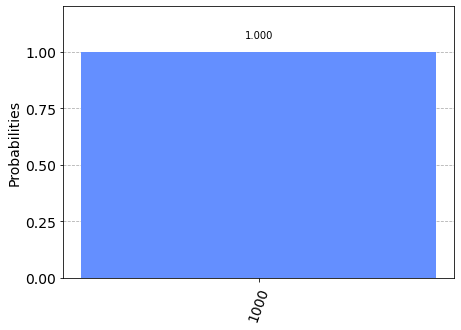

In [4]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [5]:
def shift(n_dir, n_pos):
    
    half_n = math.ceil(n_pos/2)
    
    qr = QuantumRegister(n_dir+n_pos)
    q_dir = qr[:n_dir]
    q_pos = qr[n_dir:]
    
    qc = QuantumCircuit(qr)
    
    # if direction is 00 (RIGHT)
    qc.x(q_dir)
    qc.append(increment(half_n).control(2), q_dir+q_pos[half_n:])
    qc.x(q_dir)
    
    # if direction is 01 (DOWN)
    qc.x(q_dir[0])
    qc.append(increment(half_n).control(2), q_dir+q_pos[:-half_n])
    qc.x(q_dir[0])
    
    # if direction is 10 (LEFT)
    qc.x(q_dir[1])
    qc.append(decrement(half_n).control(2), q_dir+q_pos[half_n:])
    qc.x(q_dir[1])
    
    # if direction is 11 (UP)
    qc.append(decrement(half_n).control(2), q_dir+q_pos[:-half_n])
    
    
    U_shift = qc.to_gate()
    U_shift.name = "U$_{shift}$"
    return U_shift


In [6]:
def round_remove_zeroes(np_dict):
    for a,d in np.ndenumerate(np_dict):
        for k,v in d.items():
            d[k] = round(v, 5)
    
    new_dict = {}
    for a,d in np.ndenumerate(np_dict):
        for k,v in d.items():
            if v:
                new_dict[k] = v
                
    return new_dict

In [7]:
def bitshift(b, pos):
    return str(int(int(b) + 10**pos))[1:]


In [8]:
def get_start_bits(index, n_pos):
    ''' 
    Returns list of bits to flip to set start location, based on desired index
    
    '''
    
    qbits = []
    pos = n_pos/2 # n_positions for this half of the bitstring
    
    left = bin(index[0])[2:]
    right = bin(index[1])[2:]
    
    bitstring = '00' + bitshift(left, pos) + bitshift(right, pos)
    
    for i in range(len(bitstring)):
        if bitstring[i] == '1':
            qbits.append(i)
            
    return qbits
    

In [137]:
def multiply_grid(grid, factor):
    f = np.ones((factor, factor))
    return np.kron(f, grid) # tensor product

# print start state
inf = multiply_grid(sg, 2)
print(inf)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
n_dir = 2 # number of qubits required to represent all directions
n_pos = 6 # number of qubits required to represent all positions
iterations = 25
start = (3,3) # (row, column)

qwalk_reg = QuantumRegister(n_dir+n_pos+1)

# allocating qubits
q_dir = qwalk_reg[:n_dir]
q_pos = qwalk_reg[n_dir:n_dir+n_pos]
q_anc = qwalk_reg[n_dir+n_pos]

# lists of indices
dir_ind = list(range(n_dir))
pos_ind = list(range(n_dir+n_pos))[2:]
anc_ind = n_dir+n_pos

qwalk_circ = QuantumCircuit(qwalk_reg, ClassicalRegister(n_pos))

# set up the initial position
if get_start_bits(start, n_pos):
    qwalk_circ.x(get_start_bits(start, n_pos)) # start in chosen position
    
# for qubit in q_pos:
#     qwalk_circ.h(qubit)  # start in equal superposition of all positions
    
# set up the initial direction(s)
for qubit in q_dir:
    qwalk_circ.h(qubit)

    
# qwalk_circ.x(q_anc)
## Add state harvesting
states = []

states.append(Statevector.from_instruction(qwalk_circ))
for i in range(iterations):
#     qwalk_circ.mcx(pos_ind, anc_ind) # oracle, target is |11111..1>
  
########

#     # controlled shift where ancilla is control
#     # only shift if we are in a non-target state
    qwalk_circ.x(q_anc)
    qwalk_circ.append(shift(n_dir, n_pos).control(1), [anc_ind]+dir_ind+pos_ind)
    
########  
# # Removed control gate entirely
#     qwalk_circ.x(q_anc)
#     qwalk_circ.append(shift(n_dir, n_pos).control(1), [anc_ind]+dir_ind+pos_ind)
    
    # add state to list
    states.append(Statevector.from_instruction(qwalk_circ))
    
    qwalk_circ.x(q_anc)
#     qwalk_circ.reset(q_anc)
    
    # reset directions to be equal positive superposition (no destructive interference)
    #qwalk_circ.reset(q_dir) # THIS IS THE BUG!!!!
    qwalk_circ.h(q_dir)
    
    
qwalk_circ.measure(pos_ind, list(range(n_pos))[::-1]) # reversed to print in Big Endian form

qwalk_circ.draw('mpl')

Position qubits: {'011011': 1.0}
Data: [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


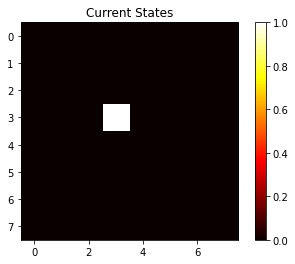

Position qubits: {'010011': 0.25, '011010': 0.25, '011100': 0.25, '100011': 0.25}
Data: [[0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]


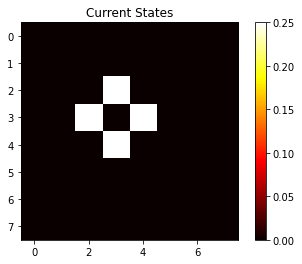

Position qubits: {'001011': 0.0625, '010010': 0.125, '010100': 0.125, '011001': 0.0625, '011011': 0.25, '011101': 0.0625, '100010': 0.125, '100100': 0.125, '101011': 0.0625}
Data: [[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.0625 0.     0.     0.     0.    ]
 [0.     0.     0.125  0.     0.125  0.     0.     0.    ]
 [0.     0.0625 0.     0.25   0.     0.0625 0.     0.    ]
 [0.     0.     0.125  0.     0.125  0.     0.     0.    ]
 [0.     0.     0.     0.0625 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]


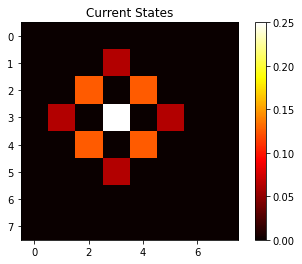

Position qubits: {'000011': 0.01562, '001010': 0.01562, '001100': 0.07812, '010001': 0.07812, '010011': 0.07812, '010101': 0.07812, '011000': 0.01562, '011010': 0.07812, '011100': 0.01562, '011110': 0.01562, '100001': 0.01562, '100011': 0.39062, '100101': 0.07812, '101010': 0.01562, '101100': 0.01562, '110011': 0.01562}
Data: [[0.      0.      0.      0.01562 0.      0.      0.      0.     ]
 [0.      0.      0.01562 0.      0.07812 0.      0.      0.     ]
 [0.      0.07812 0.      0.07812 0.      0.07812 0.      0.     ]
 [0.01562 0.      0.07812 0.      0.01562 0.      0.01562 0.     ]
 [0.      0.01562 0.      0.39062 0.      0.07812 0.      0.     ]
 [0.      0.      0.01562 0.      0.01562 0.      0.      0.     ]
 [0.      0.      0.      0.01562 0.      0.      0.      0.     ]
 [0.      0.      0.      0.      0.      0.      0.      0.     ]]


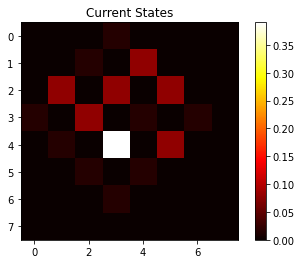

Position qubits: {'000010': 0.00781, '000100': 0.03906, '001001': 0.00781, '001011': 0.01562, '001101': 0.07031, '010000': 0.03906, '010010': 0.10937, '010100': 0.04687, '010110': 0.03906, '011001': 0.01562, '011011': 0.07812, '011101': 0.01562, '011111': 0.00781, '100000': 0.00781, '100010': 0.04687, '100100': 0.35937, '100110': 0.03906, '101001': 0.00781, '101011': 0.01562, '101101': 0.00781, '110010': 0.00781, '110100': 0.00781, '111011': 0.00781}
Data: [[0.      0.      0.00781 0.      0.03906 0.      0.      0.     ]
 [0.      0.00781 0.      0.01562 0.      0.07031 0.      0.     ]
 [0.03906 0.      0.10937 0.      0.04687 0.      0.03906 0.     ]
 [0.      0.01562 0.      0.07812 0.      0.01562 0.      0.00781]
 [0.00781 0.      0.04687 0.      0.35937 0.      0.03906 0.     ]
 [0.      0.00781 0.      0.01562 0.      0.00781 0.      0.     ]
 [0.      0.      0.00781 0.      0.00781 0.      0.      0.     ]
 [0.      0.      0.      0.00781 0.      0.      0.      0.     ]]


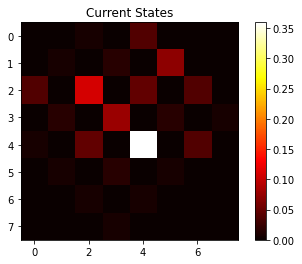

Position qubits: {'000001': 0.00391, '000011': 0.00391, '000101': 0.05078, '001000': 0.00391, '001010': 0.01953, '001100': 0.03516, '001110': 0.05078, '010001': 0.08203, '010011': 0.04687, '010101': 0.01953, '010111': 0.03516, '011000': 0.00391, '011010': 0.04687, '011100': 0.07812, '011110': 0.02734, '100001': 0.01953, '100011': 0.07812, '100101': 0.16016, '100111': 0.01953, '101000': 0.00391, '101010': 0.00391, '101100': 0.16016, '101110': 0.00391, '110001': 0.00391, '110011': 0.00391, '110101': 0.00391, '111010': 0.01172, '111100': 0.01953}
Data: [[0.      0.00391 0.      0.00391 0.      0.05078 0.      0.     ]
 [0.00391 0.      0.01953 0.      0.03516 0.      0.05078 0.     ]
 [0.      0.08203 0.      0.04687 0.      0.01953 0.      0.03516]
 [0.00391 0.      0.04687 0.      0.07812 0.      0.02734 0.     ]
 [0.      0.01953 0.      0.07812 0.      0.16016 0.      0.01953]
 [0.00391 0.      0.00391 0.      0.16016 0.      0.00391 0.     ]
 [0.      0.00391 0.      0.00391 0.      

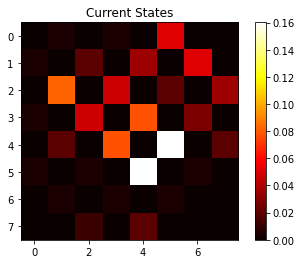

Position qubits: {'000000': 0.00195, '000010': 0.01953, '000100': 0.01953, '000110': 0.04883, '001001': 0.05859, '001011': 0.00684, '001101': 0.03516, '001111': 0.02637, '010000': 0.05078, '010010': 0.01758, '010100': 0.04883, '010110': 0.00391, '011001': 0.03809, '011011': 0.04687, '011101': 0.01465, '011111': 0.03516, '100000': 0.01953, '100010': 0.01758, '100100': 0.14258, '100110': 0.05078, '101001': 0.00391, '101011': 0.0459, '101101': 0.10547, '101111': 0.01074, '110000': 0.00195, '110010': 0.00391, '110100': 0.08203, '110110': 0.00195, '111001': 0.00293, '111011': 0.00391, '111101': 0.03418}
Data: [[0.00195 0.      0.01953 0.      0.01953 0.      0.04883 0.     ]
 [0.      0.05859 0.      0.00684 0.      0.03516 0.      0.02637]
 [0.05078 0.      0.01758 0.      0.04883 0.      0.00391 0.     ]
 [0.      0.03809 0.      0.04687 0.      0.01465 0.      0.03516]
 [0.01953 0.      0.01758 0.      0.14258 0.      0.05078 0.     ]
 [0.      0.00391 0.      0.0459  0.      0.10547 0. 

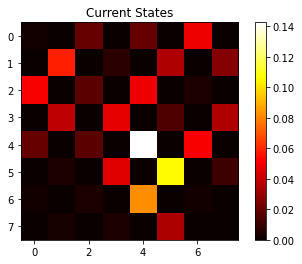

Position qubits: {'000001': 0.02271, '000011': 0.00024, '000101': 0.03345, '000111': 0.03735, '001000': 0.07642, '001010': 0.01782, '001100': 0.0188, '001110': 0.02173, '010001': 0.01685, '010011': 0.0188, '010101': 0.02466, '010111': 0.02173, '011000': 0.02759, '011010': 0.04419, '011100': 0.04321, '011110': 0.02368, '100001': 0.01782, '100011': 0.01392, '100101': 0.02271, '100111': 0.01587, '101000': 0.01099, '101010': 0.01782, '101100': 0.24048, '101110': 0.08423, '110001': 0.00122, '110011': 0.02173, '110101': 0.03247, '110111': 0.00317, '111000': 0.00024, '111010': 0.00806, '111100': 0.01587, '111110': 0.04419}
Data: [[0.0000e+00 2.2710e-02 0.0000e+00 2.4000e-04 0.0000e+00 3.3450e-02
  0.0000e+00 3.7350e-02]
 [7.6420e-02 0.0000e+00 1.7820e-02 0.0000e+00 1.8800e-02 0.0000e+00
  2.1730e-02 0.0000e+00]
 [0.0000e+00 1.6850e-02 0.0000e+00 1.8800e-02 0.0000e+00 2.4660e-02
  0.0000e+00 2.1730e-02]
 [2.7590e-02 0.0000e+00 4.4190e-02 0.0000e+00 4.3210e-02 0.0000e+00
  2.3680e-02 0.0000e+00

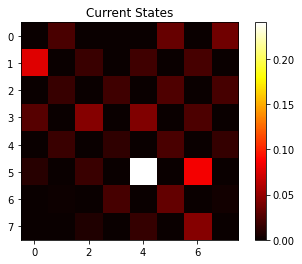

Position qubits: {'000000': 0.03296, '000010': 0.0105, '000100': 0.0105, '000110': 0.03394, '001001': 0.07056, '001011': 0.01196, '001101': 0.02075, '001111': 0.02563, '010000': 0.03394, '010010': 0.00952, '010100': 0.02222, '010110': 0.0105, '011001': 0.00806, '011011': 0.04419, '011101': 0.06079, '011111': 0.02173, '100000': 0.0105, '100010': 0.0144, '100100': 0.02124, '100110': 0.0105, '101001': 0.00903, '101011': 0.02563, '101101': 0.24634, '101111': 0.06665, '110000': 0.00269, '110010': 0.0105, '110100': 0.03394, '110110': 0.03687, '111001': 0.0061, '111011': 0.01001, '111101': 0.02368, '111111': 0.04419}
Data: [[0.03296 0.      0.0105  0.      0.0105  0.      0.03394 0.     ]
 [0.      0.07056 0.      0.01196 0.      0.02075 0.      0.02563]
 [0.03394 0.      0.00952 0.      0.02222 0.      0.0105  0.     ]
 [0.      0.00806 0.      0.04419 0.      0.06079 0.      0.02173]
 [0.0105  0.      0.0144  0.      0.02124 0.      0.0105  0.     ]
 [0.      0.00903 0.      0.02563 0.     

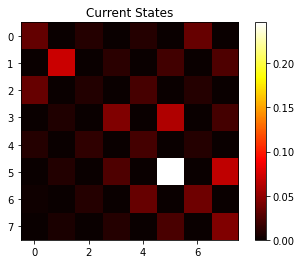

Position qubits: {'000001': 0.03955, '000011': 0.01123, '000101': 0.0249, '000111': 0.01392, '001000': 0.06299, '001010': 0.00928, '001100': 0.02979, '001110': 0.021, '010001': 0.05127, '010011': 0.02026, '010101': 0.00537, '010111': 0.01025, '011000': 0.01709, '011010': 0.02417, '011100': 0.0022, '011110': 0.06494, '100001': 0.00928, '100011': 0.02954, '100101': 0.03955, '100111': 0.01123, '101000': 0.04932, '101010': 0.00928, '101100': 0.05127, '101110': 0.1499, '110001': 0.00537, '110011': 0.01025, '110101': 0.08643, '110111': 0.0437, '111000': 0.02563, '111010': 0.01416, '111100': 0.00146, '111110': 0.05542}
Data: [[0.      0.03955 0.      0.01123 0.      0.0249  0.      0.01392]
 [0.06299 0.      0.00928 0.      0.02979 0.      0.021   0.     ]
 [0.      0.05127 0.      0.02026 0.      0.00537 0.      0.01025]
 [0.01709 0.      0.02417 0.      0.0022  0.      0.06494 0.     ]
 [0.      0.00928 0.      0.02954 0.      0.03955 0.      0.01123]
 [0.04932 0.      0.00928 0.      0.051

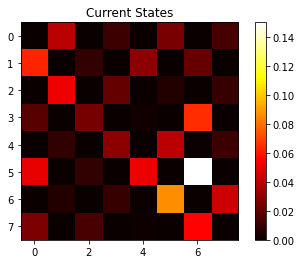

Position qubits: {'000000': 0.04089, '000010': 0.01318, '000100': 0.00537, '000110': 0.02576, '001001': 0.02197, '001011': 0.00665, '001101': 0.04932, '001111': 0.02301, '010000': 0.03662, '010010': 0.04187, '010100': 0.00378, '010110': 0.01514, '011001': 0.00543, '011011': 0.02417, '011101': 0.01349, '011111': 0.05127, '100000': 0.00928, '100010': 0.02576, '100100': 0.03894, '100110': 0.03662, '101001': 0.02979, '101011': 0.01227, '101101': 0.09229, '101111': 0.07208, '110000': 0.04285, '110010': 0.00342, '110100': 0.01318, '110110': 0.05945, '111001': 0.03595, '111011': 0.02783, '111101': 0.06696, '111111': 0.05542}
Data: [[0.04089 0.      0.01318 0.      0.00537 0.      0.02576 0.     ]
 [0.      0.02197 0.      0.00665 0.      0.04932 0.      0.02301]
 [0.03662 0.      0.04187 0.      0.00378 0.      0.01514 0.     ]
 [0.      0.00543 0.      0.02417 0.      0.01349 0.      0.05127]
 [0.00928 0.      0.02576 0.      0.03894 0.      0.03662 0.     ]
 [0.      0.02979 0.      0.01227

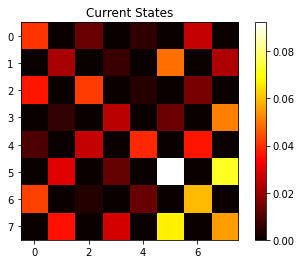

Position qubits: {'000001': 0.00996, '000011': 0.01259, '000101': 0.07997, '000111': 0.02541, '001000': 0.01894, '001010': 0.0331, '001100': 0.01094, '001110': 0.0038, '010001': 0.02632, '010011': 0.00703, '010101': 0.00655, '010111': 0.05751, '011000': 0.00539, '011010': 0.01106, '011100': 0.02345, '011110': 0.03419, '100001': 0.00868, '100011': 0.05568, '100101': 0.04219, '100111': 0.01942, '101000': 0.05098, '101010': 0.02333, '101100': 0.00819, '101110': 0.02138, '110001': 0.03487, '110011': 0.02919, '110101': 0.11909, '110111': 0.06465, '111000': 0.04298, '111010': 0.02931, '111100': 0.00929, '111110': 0.07454}
Data: [[0.      0.00996 0.      0.01259 0.      0.07997 0.      0.02541]
 [0.01894 0.      0.0331  0.      0.01094 0.      0.0038  0.     ]
 [0.      0.02632 0.      0.00703 0.      0.00655 0.      0.05751]
 [0.00539 0.      0.01106 0.      0.02345 0.      0.03419 0.     ]
 [0.      0.00868 0.      0.05568 0.      0.04219 0.      0.01942]
 [0.05098 0.      0.02333 0.      0

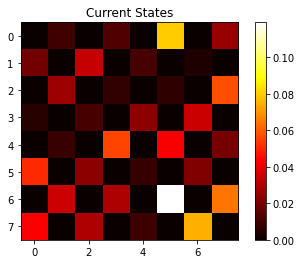

Position qubits: {'000000': 0.02904, '000010': 0.02019, '000100': 0.00774, '000110': 0.09343, '001001': 0.00819, '001011': 0.0276, '001101': 0.01094, '001111': 0.00465, '010000': 0.04729, '010010': 0.0266, '010100': 0.00237, '010110': 0.02312, '011001': 0.01076, '011011': 0.01106, '011101': 0.03053, '011111': 0.01808, '100000': 0.01848, '100010': 0.01335, '100100': 0.0554, '100110': 0.05241, '101001': 0.05098, '101011': 0.01637, '101101': 0.01894, '101111': 0.01588, '110000': 0.05119, '110010': 0.02409, '110100': 0.01897, '110110': 0.11546, '111001': 0.03835, '111011': 0.04543, '111101': 0.01857, '111111': 0.07454}
Data: [[0.02904 0.      0.02019 0.      0.00774 0.      0.09343 0.     ]
 [0.      0.00819 0.      0.0276  0.      0.01094 0.      0.00465]
 [0.04729 0.      0.0266  0.      0.00237 0.      0.02312 0.     ]
 [0.      0.01076 0.      0.01106 0.      0.03053 0.      0.01808]
 [0.01848 0.      0.01335 0.      0.0554  0.      0.05241 0.     ]
 [0.      0.05098 0.      0.01637 0.

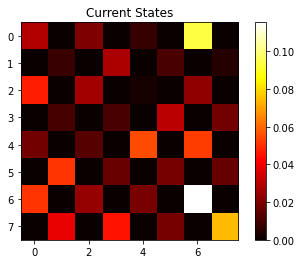

Position qubits: {'000001': 0.00931, '000011': 0.02579, '000101': 0.02817, '000111': 0.05171, '001000': 0.02347, '001010': 0.03494, '001100': 0.00528, '001110': 0.02176, '010001': 0.02731, '010011': 0.00407, '010101': 0.01785, '010111': 0.03128, '011000': 0.02383, '011010': 0.02031, '011100': 0.01204, '011110': 0.02469, '100001': 0.01352, '100011': 0.02534, '100101': 0.01224, '100111': 0.06387, '101000': 0.00528, '101010': 0.06277, '101100': 0.05276, '101110': 0.00565, '110001': 0.03055, '110011': 0.01859, '110101': 0.03317, '110111': 0.11931, '111000': 0.03255, '111010': 0.02469, '111100': 0.03946, '111110': 0.09843}
Data: [[0.      0.00931 0.      0.02579 0.      0.02817 0.      0.05171]
 [0.02347 0.      0.03494 0.      0.00528 0.      0.02176 0.     ]
 [0.      0.02731 0.      0.00407 0.      0.01785 0.      0.03128]
 [0.02383 0.      0.02031 0.      0.01204 0.      0.02469 0.     ]
 [0.      0.01352 0.      0.02534 0.      0.01224 0.      0.06387]
 [0.00528 0.      0.06277 0.     

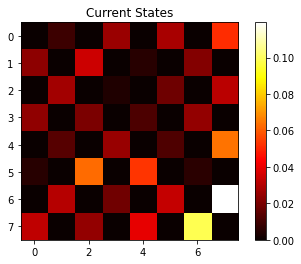

Position qubits: {'000000': 0.0436, '000010': 0.01321, '000100': 0.02716, '000110': 0.11745, '001001': 0.05276, '001011': 0.00447, '001101': 0.00528, '001111': 0.05823, '010000': 0.02249, '010010': 0.00173, '010100': 0.00219, '010110': 0.03113, '011001': 0.0141, '011011': 0.02031, '011101': 0.0226, '011111': 0.02469, '100000': 0.0506, '100010': 0.0154, '100100': 0.05093, '100110': 0.0054, '101001': 0.00528, '101011': 0.09241, '101101': 0.02347, '101111': 0.00447, '110000': 0.03002, '110010': 0.02917, '110100': 0.0303, '110110': 0.04128, '111001': 0.0226, '111011': 0.02469, '111101': 0.0141, '111111': 0.09843}
Data: [[0.0436  0.      0.01321 0.      0.02716 0.      0.11745 0.     ]
 [0.      0.05276 0.      0.00447 0.      0.00528 0.      0.05823]
 [0.02249 0.      0.00173 0.      0.00219 0.      0.03113 0.     ]
 [0.      0.0141  0.      0.02031 0.      0.0226  0.      0.02469]
 [0.0506  0.      0.0154  0.      0.05093 0.      0.0054  0.     ]
 [0.      0.00528 0.      0.09241 0.      

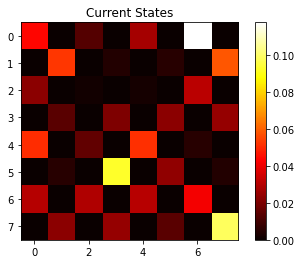

Position qubits: {'000001': 0.03154, '000011': 0.01712, '000101': 0.00387, '000111': 0.06114, '001000': 0.10104, '001010': 0.03932, '001100': 0.00792, '001110': 0.03633, '010001': 0.00519, '010011': 0.01077, '010101': 0.01149, '010111': 0.01725, '011000': 0.03646, '011010': 0.0116, '011100': 0.0115, '011110': 0.0208, '100001': 0.02731, '100011': 0.01768, '100101': 0.01249, '100111': 0.01224, '101000': 0.00792, '101010': 0.01582, '101100': 0.16158, '101110': 0.0071, '110001': 0.01882, '110011': 0.0153, '110101': 0.01593, '110111': 0.02981, '111000': 0.08865, '111010': 0.0208, '111100': 0.03353, '111110': 0.09168}
Data: [[0.      0.03154 0.      0.01712 0.      0.00387 0.      0.06114]
 [0.10104 0.      0.03932 0.      0.00792 0.      0.03633 0.     ]
 [0.      0.00519 0.      0.01077 0.      0.01149 0.      0.01725]
 [0.03646 0.      0.0116  0.      0.0115  0.      0.0208  0.     ]
 [0.      0.02731 0.      0.01768 0.      0.01249 0.      0.01224]
 [0.00792 0.      0.01582 0.      0.161

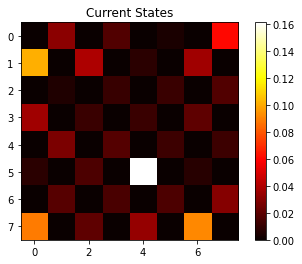

Position qubits: {'000000': 0.05189, '000010': 0.04301, '000100': 0.00996, '000110': 0.03173, '001001': 0.11398, '001011': 0.02101, '001101': 0.00792, '001111': 0.04121, '010000': 0.00309, '010010': 0.00638, '010100': 0.01099, '010110': 0.01988, '011001': 0.04671, '011011': 0.0116, '011101': 0.00956, '011111': 0.02287, '100000': 0.00996, '100010': 0.02709, '100100': 0.01649, '100110': 0.00859, '101001': 0.00792, '101011': 0.02583, '101101': 0.14864, '101111': 0.01051, '110000': 0.00196, '110010': 0.01988, '110100': 0.02189, '110110': 0.02518, '111001': 0.07914, '111011': 0.01872, '111101': 0.03475, '111111': 0.09168}
Data: [[0.05189 0.      0.04301 0.      0.00996 0.      0.03173 0.     ]
 [0.      0.11398 0.      0.02101 0.      0.00792 0.      0.04121]
 [0.00309 0.      0.00638 0.      0.01099 0.      0.01988 0.     ]
 [0.      0.04671 0.      0.0116  0.      0.00956 0.      0.02287]
 [0.00996 0.      0.02709 0.      0.01649 0.      0.00859 0.     ]
 [0.      0.00792 0.      0.02583 

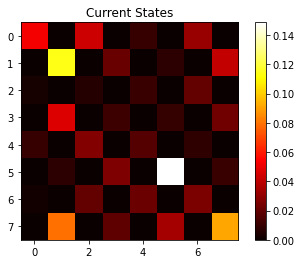

Position qubits: {'000001': 0.08395, '000011': 0.04096, '000101': 0.0076, '000111': 0.05191, '001000': 0.08579, '001010': 0.02125, '001100': 0.00933, '001110': 0.00525, '010001': 0.02554, '010011': 0.01596, '010101': 0.01061, '010111': 0.03137, '011000': 0.0179, '011010': 0.04308, '011100': 0.00694, '011110': 0.01877, '100001': 0.01834, '100011': 0.02579, '100101': 0.07028, '100111': 0.00654, '101000': 0.01592, '101010': 0.01159, '101100': 0.04233, '101110': 0.03248, '110001': 0.00158, '110011': 0.01769, '110101': 0.06143, '110111': 0.00522, '111000': 0.06212, '111010': 0.05344, '111100': 0.03499, '111110': 0.06407}
Data: [[0.      0.08395 0.      0.04096 0.      0.0076  0.      0.05191]
 [0.08579 0.      0.02125 0.      0.00933 0.      0.00525 0.     ]
 [0.      0.02554 0.      0.01596 0.      0.01061 0.      0.03137]
 [0.0179  0.      0.04308 0.      0.00694 0.      0.01877 0.     ]
 [0.      0.01834 0.      0.02579 0.      0.07028 0.      0.00654]
 [0.01592 0.      0.01159 0.      0

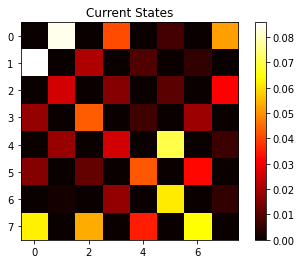

Position qubits: {'000000': 0.05825, '000010': 0.05245, '000100': 0.01443, '000110': 0.01008, '001001': 0.07614, '001011': 0.01189, '001101': 0.01446, '001111': 0.07936, '010000': 0.07653, '010010': 0.02457, '010100': 0.01348, '010110': 0.01542, '011001': 0.0023, '011011': 0.04308, '011101': 0.02816, '011111': 0.0167, '100000': 0.01443, '100010': 0.02083, '100100': 0.02675, '100110': 0.04, '101001': 0.0108, '101011': 0.01534, '101101': 0.05197, '101111': 0.00523, '110000': 0.00273, '110010': 0.01542, '110100': 0.0343, '110110': 0.05509, '111001': 0.03603, '111011': 0.05551, '111101': 0.0142, '111111': 0.06407}
Data: [[0.05825 0.      0.05245 0.      0.01443 0.      0.01008 0.     ]
 [0.      0.07614 0.      0.01189 0.      0.01446 0.      0.07936]
 [0.07653 0.      0.02457 0.      0.01348 0.      0.01542 0.     ]
 [0.      0.0023  0.      0.04308 0.      0.02816 0.      0.0167 ]
 [0.01443 0.      0.02083 0.      0.02675 0.      0.04    0.     ]
 [0.      0.0108  0.      0.01534 0.     

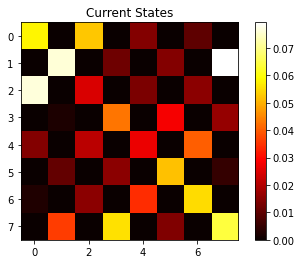

Position qubits: {'000001': 0.04062, '000011': 0.03836, '000101': 0.00855, '000111': 0.05979, '001000': 0.08448, '001010': 0.03498, '001100': 0.00856, '001110': 0.00617, '010001': 0.10511, '010011': 0.04565, '010101': 0.02023, '010111': 0.01932, '011000': 0.01159, '011010': 0.01118, '011100': 0.02586, '011110': 0.03734, '100001': 0.01563, '100011': 0.00809, '100101': 0.03452, '100111': 0.02536, '101000': 0.00856, '101010': 0.00617, '101100': 0.02015, '101110': 0.03498, '110001': 0.01358, '110011': 0.02543, '110101': 0.06379, '110111': 0.0166, '111000': 0.02586, '111010': 0.09069, '111100': 0.01159, '111110': 0.04121}
Data: [[0.      0.04062 0.      0.03836 0.      0.00855 0.      0.05979]
 [0.08448 0.      0.03498 0.      0.00856 0.      0.00617 0.     ]
 [0.      0.10511 0.      0.04565 0.      0.02023 0.      0.01932]
 [0.01159 0.      0.01118 0.      0.02586 0.      0.03734 0.     ]
 [0.      0.01563 0.      0.00809 0.      0.03452 0.      0.02536]
 [0.00856 0.      0.00617 0.      

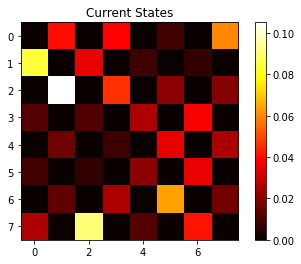

Position qubits: {'000000': 0.05669, '000010': 0.05612, '000100': 0.01537, '000110': 0.01476, '001001': 0.07755, '001011': 0.03742, '001101': 0.00856, '001111': 0.01423, '010000': 0.03984, '010010': 0.0797, '010100': 0.05, '010110': 0.0235, '011001': 0.01098, '011011': 0.01118, '011101': 0.01597, '011111': 0.02157, '100000': 0.0418, '100010': 0.01128, '100100': 0.0335, '100110': 0.01401, '101001': 0.00856, '101011': 0.01423, '101101': 0.02708, '101111': 0.03742, '110000': 0.01039, '110010': 0.01685, '110100': 0.00993, '110110': 0.06689, '111001': 0.01597, '111011': 0.10647, '111101': 0.01098, '111111': 0.04121}
Data: [[0.05669 0.      0.05612 0.      0.01537 0.      0.01476 0.     ]
 [0.      0.07755 0.      0.03742 0.      0.00856 0.      0.01423]
 [0.03984 0.      0.0797  0.      0.05    0.      0.0235  0.     ]
 [0.      0.01098 0.      0.01118 0.      0.01597 0.      0.02157]
 [0.0418  0.      0.01128 0.      0.0335  0.      0.01401 0.     ]
 [0.      0.00856 0.      0.01423 0.    

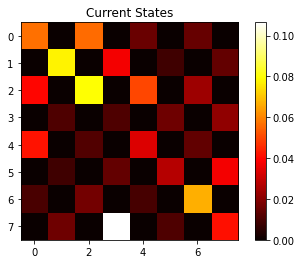

Position qubits: {'000001': 0.03723, '000011': 0.05164, '000101': 0.00441, '000111': 0.05797, '001000': 0.03208, '001010': 0.05771, '001100': 0.03587, '001110': 0.01357, '010001': 0.06037, '010011': 0.02015, '010101': 0.04677, '010111': 0.03786, '011000': 0.01599, '011010': 0.04537, '011100': 0.03513, '011110': 0.00503, '100001': 0.03749, '100011': 0.0125, '100101': 0.03723, '100111': 0.01947, '101000': 0.03587, '101010': 0.01766, '101100': 0.0098, '101110': 0.01181, '110001': 0.0179, '110011': 0.03786, '110101': 0.0268, '110111': 0.01539, '111000': 0.01285, '111010': 0.01229, '111100': 0.09033, '111110': 0.04762}
Data: [[0.      0.03723 0.      0.05164 0.      0.00441 0.      0.05797]
 [0.03208 0.      0.05771 0.      0.03587 0.      0.01357 0.     ]
 [0.      0.06037 0.      0.02015 0.      0.04677 0.      0.03786]
 [0.01599 0.      0.04537 0.      0.03513 0.      0.00503 0.     ]
 [0.      0.03749 0.      0.0125  0.      0.03723 0.      0.01947]
 [0.03587 0.      0.01766 0.      0.0

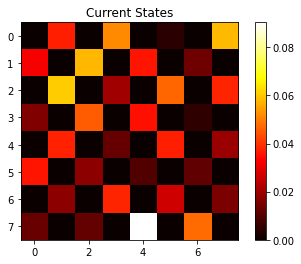

Position qubits: {'000000': 0.03168, '000010': 0.045, '000100': 0.03366, '000110': 0.01325, '001001': 0.02994, '001011': 0.022, '001101': 0.03587, '001111': 0.03665, '010000': 0.03009, '010010': 0.05862, '010100': 0.02943, '010110': 0.03222, '011001': 0.08048, '011011': 0.04537, '011101': 0.00999, '011111': 0.00839, '100000': 0.03402, '100010': 0.0282, '100100': 0.01426, '100110': 0.045, '101001': 0.03587, '101011': 0.01401, '101101': 0.01194, '101111': 0.02301, '110000': 0.00654, '110010': 0.03588, '110100': 0.03009, '110110': 0.05309, '111001': 0.01762, '111011': 0.00894, '111101': 0.05127, '111111': 0.04762}
Data: [[0.03168 0.      0.045   0.      0.03366 0.      0.01325 0.     ]
 [0.      0.02994 0.      0.022   0.      0.03587 0.      0.03665]
 [0.03009 0.      0.05862 0.      0.02943 0.      0.03222 0.     ]
 [0.      0.08048 0.      0.04537 0.      0.00999 0.      0.00839]
 [0.03402 0.      0.0282  0.      0.01426 0.      0.045   0.     ]
 [0.      0.03587 0.      0.01401 0.    

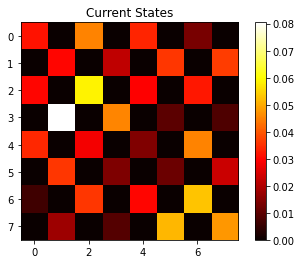

Position qubits: {'000001': 0.0105, '000011': 0.03828, '000101': 0.01969, '000111': 0.03563, '001000': 0.03999, '001010': 0.02406, '001100': 0.04869, '001110': 0.04479, '010001': 0.04138, '010011': 0.02972, '010101': 0.02022, '010111': 0.00361, '011000': 0.02334, '011010': 0.15366, '011100': 0.00489, '011110': 0.03038, '100001': 0.02006, '100011': 0.0244, '100101': 0.00217, '100111': 0.03828, '101000': 0.01437, '101010': 0.03236, '101100': 0.02068, '101110': 0.03649, '110001': 0.02022, '110011': 0.00727, '110101': 0.02338, '110111': 0.01413, '111000': 0.01812, '111010': 0.02533, '111100': 0.03657, '111110': 0.09737}
Data: [[0.      0.0105  0.      0.03828 0.      0.01969 0.      0.03563]
 [0.03999 0.      0.02406 0.      0.04869 0.      0.04479 0.     ]
 [0.      0.04138 0.      0.02972 0.      0.02022 0.      0.00361]
 [0.02334 0.      0.15366 0.      0.00489 0.      0.03038 0.     ]
 [0.      0.02006 0.      0.0244  0.      0.00217 0.      0.03828]
 [0.01437 0.      0.03236 0.      0

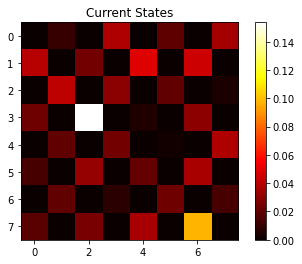

Position qubits: {'000000': 0.02953, '000010': 0.01014, '000100': 0.07053, '000110': 0.01176, '001001': 0.04453, '001011': 0.03075, '001101': 0.04868, '001111': 0.04575, '010000': 0.00127, '010010': 0.06031, '010100': 0.01045, '010110': 0.01848, '011001': 0.0286, '011011': 0.15366, '011101': 0.00357, '011111': 0.0301, '100000': 0.02239, '100010': 0.03933, '100100': 0.00547, '100110': 0.00143, '101001': 0.01438, '101011': 0.02172, '101101': 0.01614, '101111': 0.07584, '110000': 0.02206, '110010': 0.00559, '110100': 0.01072, '110110': 0.02948, '111001': 0.00807, '111011': 0.0256, '111101': 0.00631, '111111': 0.09737}
Data: [[0.02953 0.      0.01014 0.      0.07053 0.      0.01176 0.     ]
 [0.      0.04453 0.      0.03075 0.      0.04868 0.      0.04575]
 [0.00127 0.      0.06031 0.      0.01045 0.      0.01848 0.     ]
 [0.      0.0286  0.      0.15366 0.      0.00357 0.      0.0301 ]
 [0.02239 0.      0.03933 0.      0.00547 0.      0.00143 0.     ]
 [0.      0.01438 0.      0.02172 0.

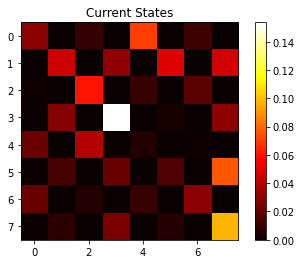

Position qubits: {'000001': 0.02962, '000011': 0.01861, '000101': 0.0861, '000111': 0.04151, '001000': 0.02997, '001010': 0.0418, '001100': 0.01912, '001110': 0.0458, '010001': 0.0197, '010011': 0.10343, '010101': 0.00939, '010111': 0.01743, '011000': 0.01707, '011010': 0.07625, '011100': 0.02416, '011110': 0.00919, '100001': 0.02651, '100011': 0.07806, '100101': 0.00555, '100111': 0.0099, '101000': 0.06421, '101010': 0.02294, '101100': 0.00594, '101110': 0.02361, '110001': 0.021, '110011': 0.00453, '110101': 0.01894, '110111': 0.03016, '111000': 0.00921, '111010': 0.00809, '111100': 0.01817, '111110': 0.06403}
Data: [[0.      0.02962 0.      0.01861 0.      0.0861  0.      0.04151]
 [0.02997 0.      0.0418  0.      0.01912 0.      0.0458  0.     ]
 [0.      0.0197  0.      0.10343 0.      0.00939 0.      0.01743]
 [0.01707 0.      0.07625 0.      0.02416 0.      0.00919 0.     ]
 [0.      0.02651 0.      0.07806 0.      0.00555 0.      0.0099 ]
 [0.06421 0.      0.02294 0.      0.0059

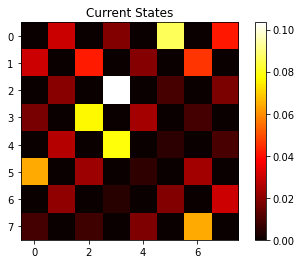

In [132]:
# PLOTTING FOR 8 x 8 GRID
sum_data = np.zeros((8,8))
meta_states = []

for state in states:
  
    # creating a dataset
    # data is an array with four sub 
    # arrays with 10 elements in each

#     np_dict_all = round_remove_zeroes(np.array(state.probabilities_dict([6,5,4,3,2,1,0])))
    #print("All qubits:", np_dict_all)
    
    np_dict = round_remove_zeroes(np.array(state.probabilities_dict([7,6,5,4,3,2])))         
    print("Position qubits:",np_dict)
    
    data = np.around(np.array(state.probabilities([7,6,5,4,3,2])), 5)
    data = np.reshape(data, (8,8))
    sum_data = sum_data + data
    meta_states.append(sum_data)
    d = state.probabilities_dict([7,6,5,4,3,2])
    
    # customizing plot
    plt.title("Current States")
    pixel_plot = plt.imshow(
      data, cmap='hot')

    plt.colorbar(pixel_plot)
    
    print("Data:",data)
    plt.show(pixel_plot)
    


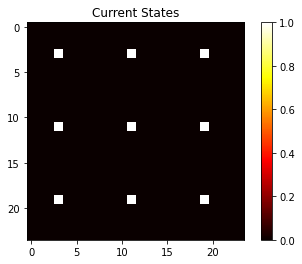

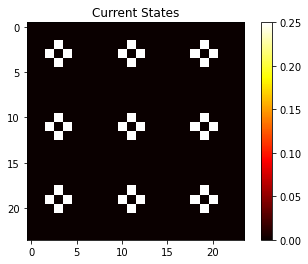

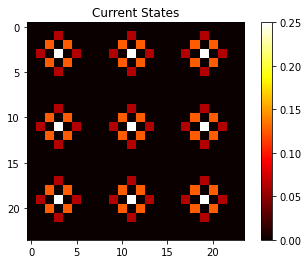

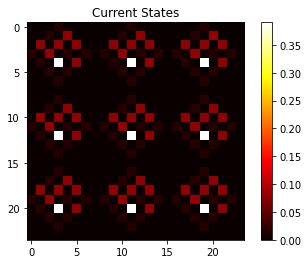

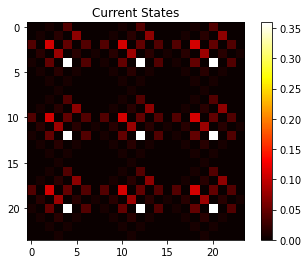

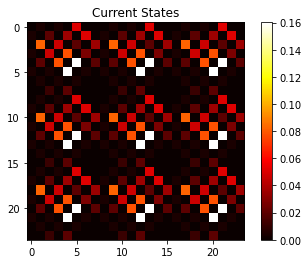

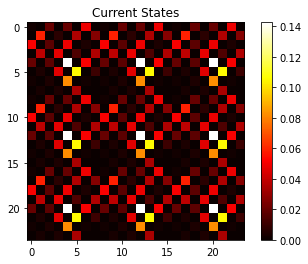

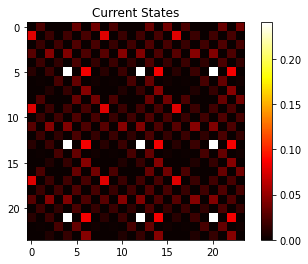

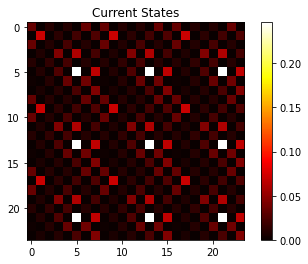

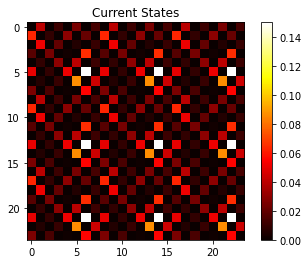

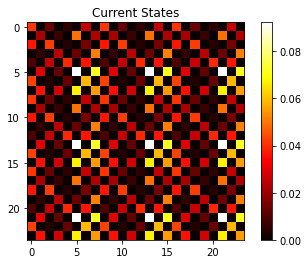

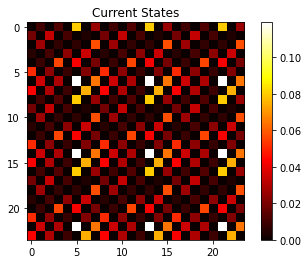

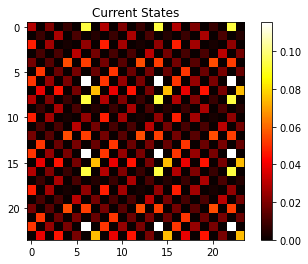

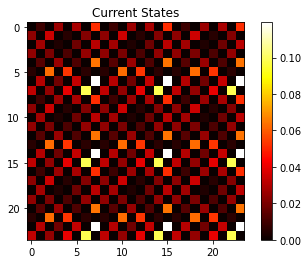

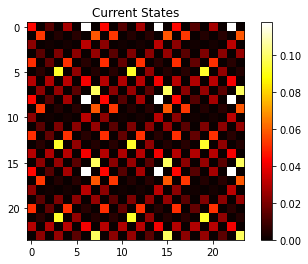

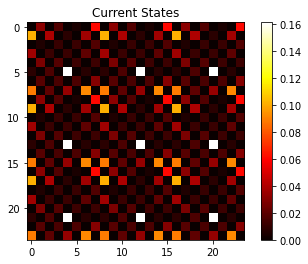

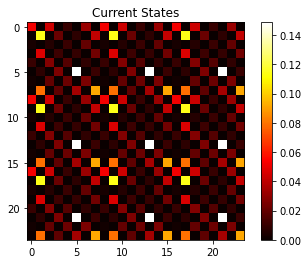

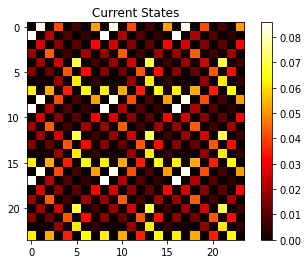

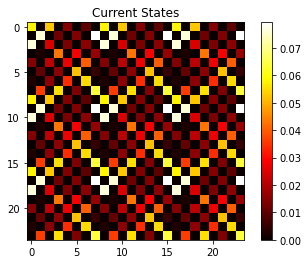

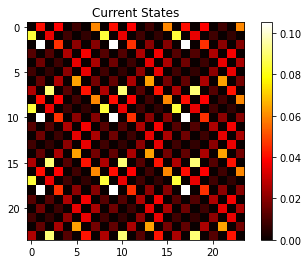

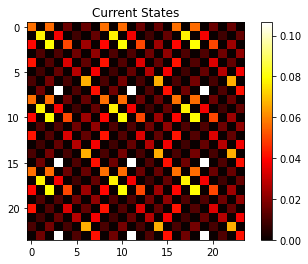

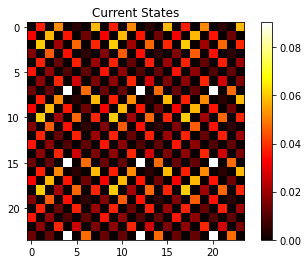

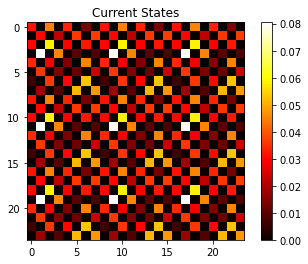

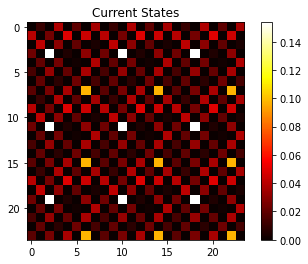

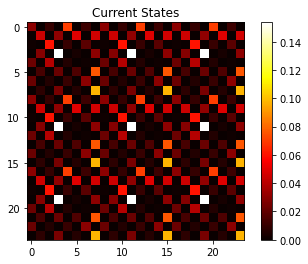

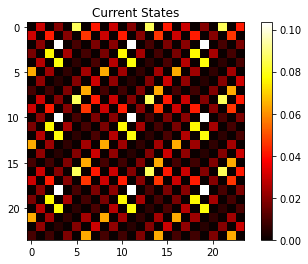

In [147]:
for state in states:
  
    np_dict = round_remove_zeroes(np.array(state.probabilities_dict([7,6,5,4,3,2])))         
#     print("Position qubits:",np_dict)
    
    data = np.around(np.array(state.probabilities([7,6,5,4,3,2])), 5)
    data = np.reshape(data, (8,8))

    
    # customizing plot
    plt.title("Current States")
    pixel_plot = plt.imshow(
      multiply_grid(data, 3), cmap='hot')

    plt.colorbar(pixel_plot)
    
#     print("Data:",data)
    plt.show(pixel_plot)
    

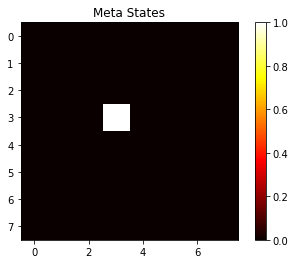

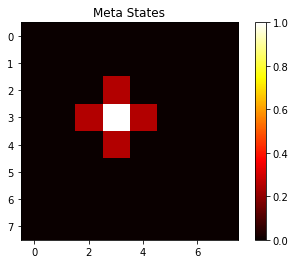

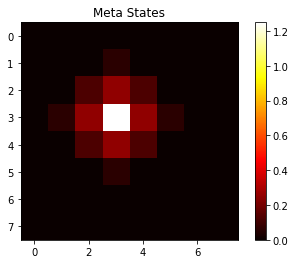

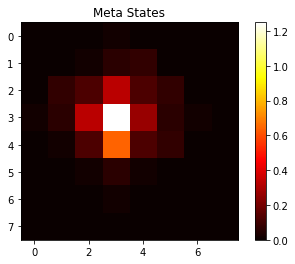

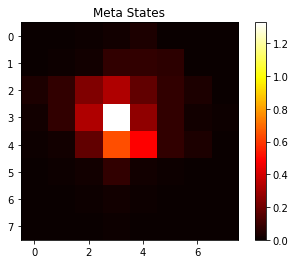

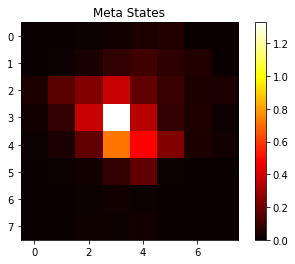

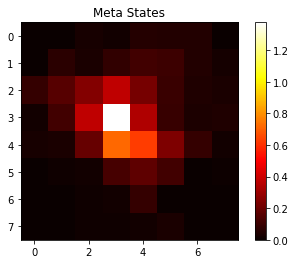

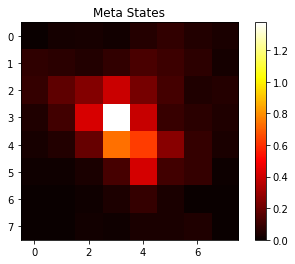

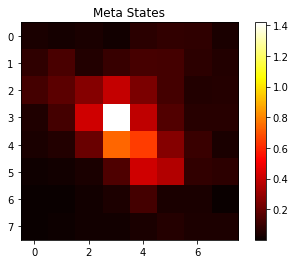

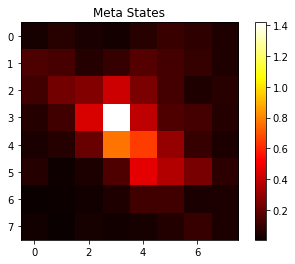

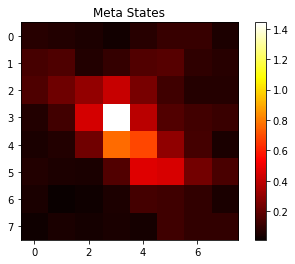

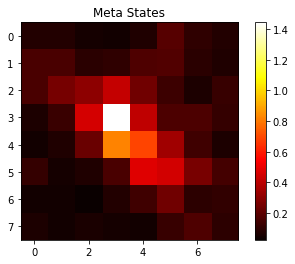

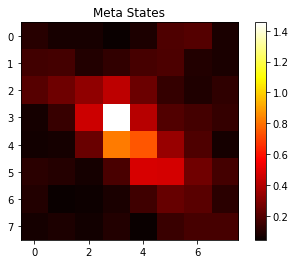

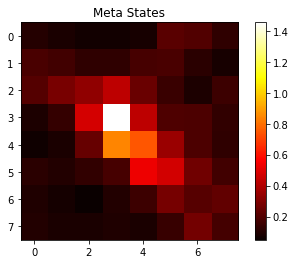

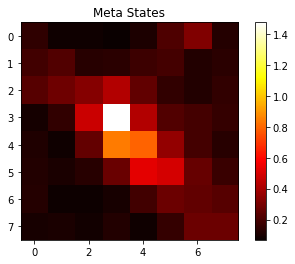

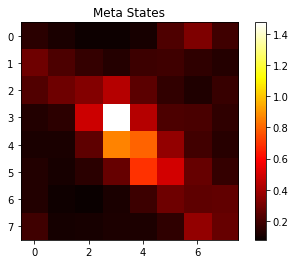

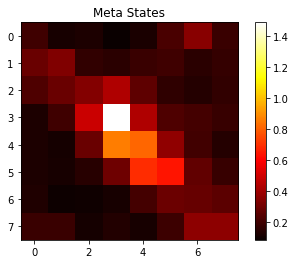

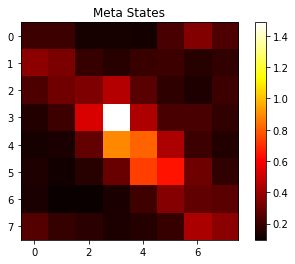

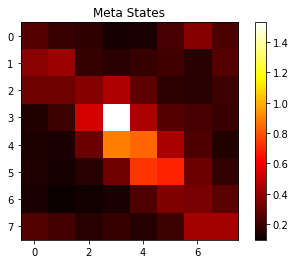

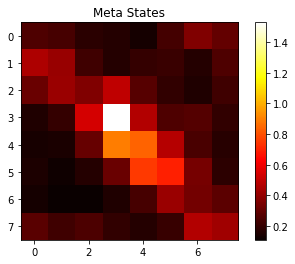

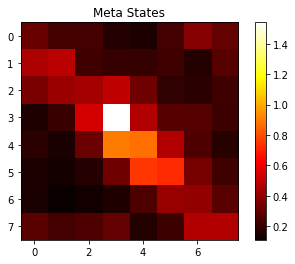

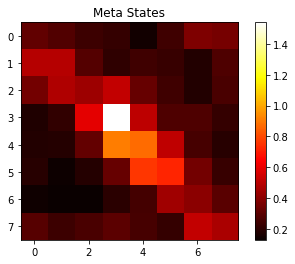

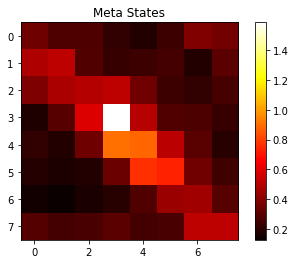

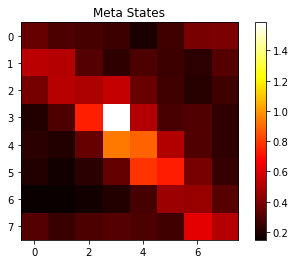

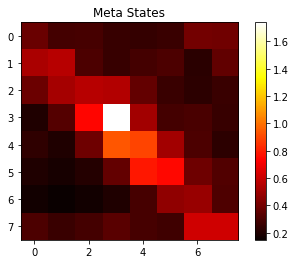

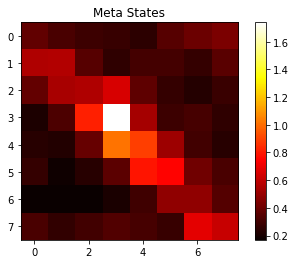

In [133]:
for data in meta_states:
    plt.title("Meta States")
    pixel_plot = plt.imshow(
      data, cmap='hot')

    plt.colorbar(pixel_plot)
    plt.show(pixel_plot)

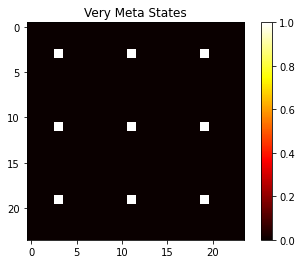

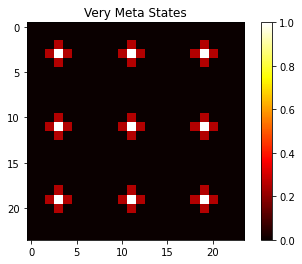

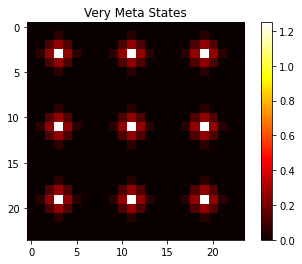

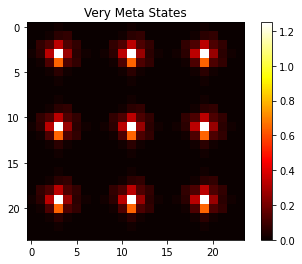

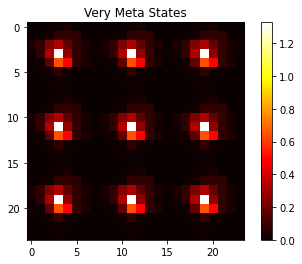

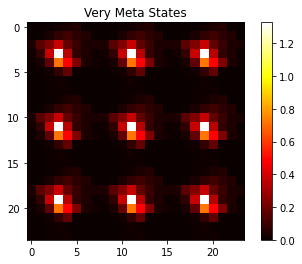

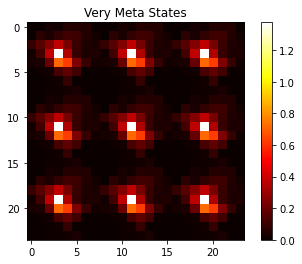

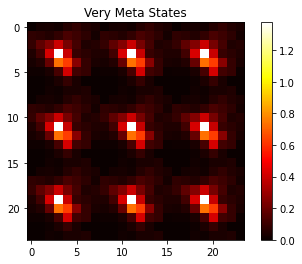

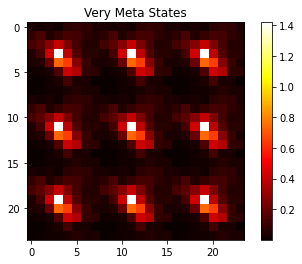

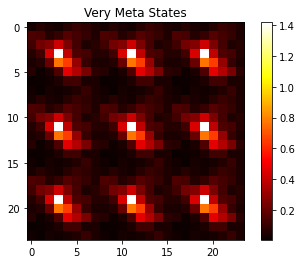

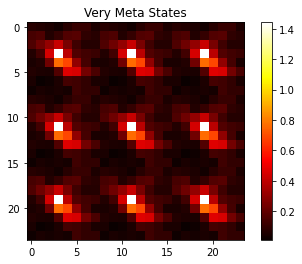

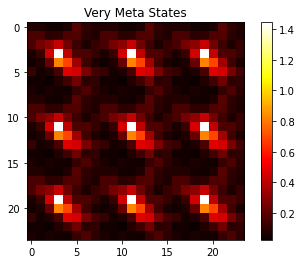

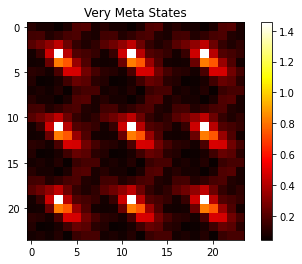

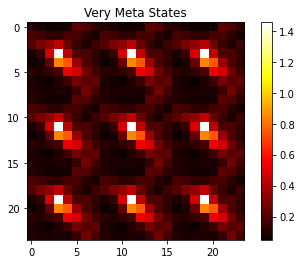

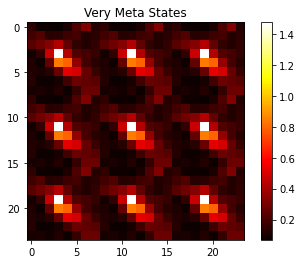

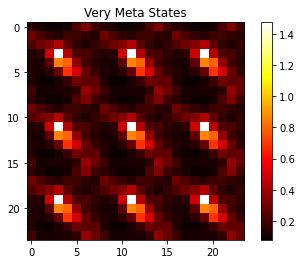

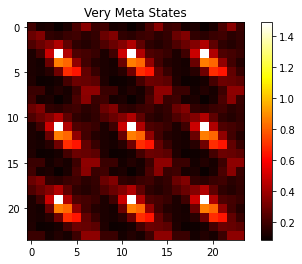

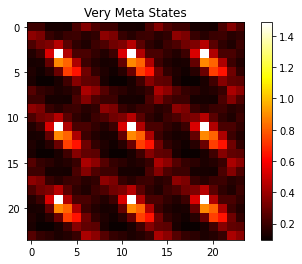

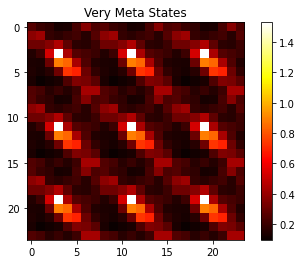

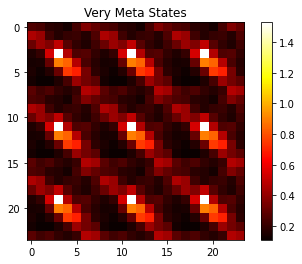

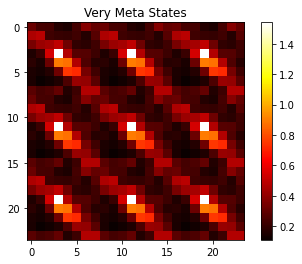

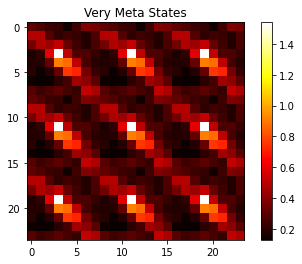

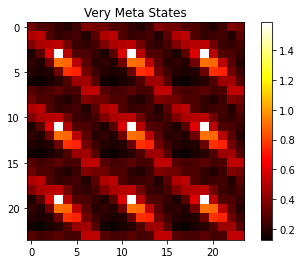

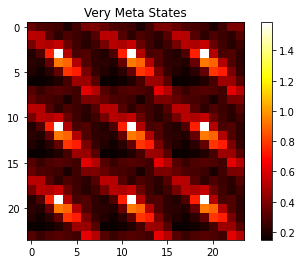

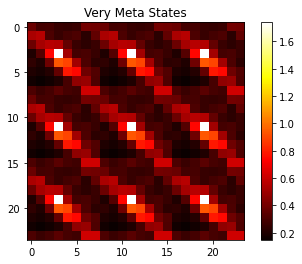

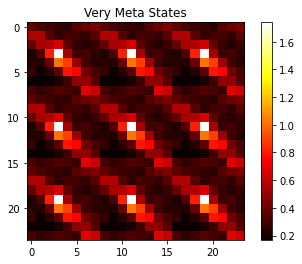

In [144]:
for data in meta_states:
    plt.title("Very Meta States")
    pixel_plot = plt.imshow(
      multiply_grid(data, 3), cmap='hot')

    plt.colorbar(pixel_plot)
    plt.show(pixel_plot)

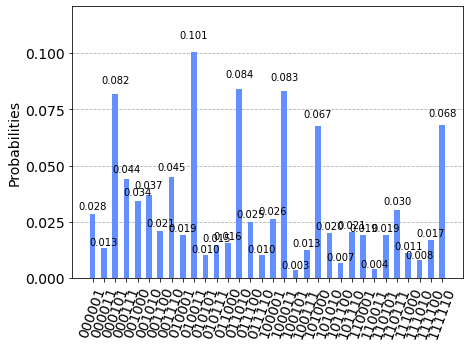

In [134]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(qwalk_circ, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
# PLOTTING FOR ORIGINAL 4 x 4 GRID

for state in states:

  
    # creating a dataset
    # data is an array with four sub 
    # arrays with 10 elements in each

    np_dict_all = round_remove_zeroes(np.array(state.probabilities_dict([6,5,4,3,2,1,0])))
    #print("All qubits:", np_dict_all)
    
    np_dict = round_remove_zeroes(np.array(state.probabilities_dict([5,4,3,2])))         
    print("Position qubits:",np_dict)
    
    data = np.around(np.array(state.probabilities([5,4,3,2])), 5)
    data = np.reshape(data, (4,4))
    d = state.probabilities_dict([5,4,3,2])
    
    # customizing plot
    plt.title("states")
    pixel_plot = plt.imshow(
      data, cmap='binary')

    plt.colorbar(pixel_plot)

#     save a plot
#     plt.savefig('pixel_plot.png')

    # show plot
    
    print("Data:",data)
    plt.show(pixel_plot)

# Iterative walker count


In [64]:
def start_grid(start_index, n_pos):
    grid = np.zeros((int(np.sqrt(2**n_pos)), int(np.sqrt(2**n_pos))))
    grid[start_index[0],start_index[1]] = 1
    return grid

sg = start_grid((3, 5), 6)
print(sg)


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


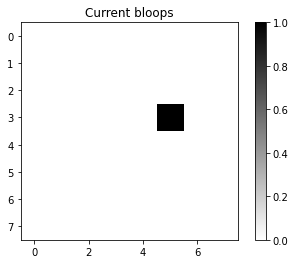

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


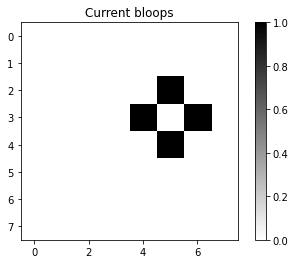

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 2. 0. 2. 0.]
 [0. 0. 0. 1. 0. 4. 0. 1.]
 [0. 0. 0. 0. 2. 0. 2. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


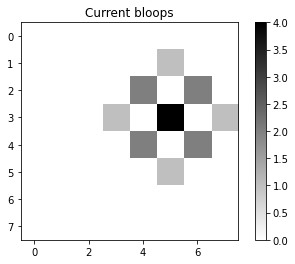

[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 3. 0. 3. 0.]
 [0. 0. 0. 3. 0. 9. 0. 3.]
 [1. 0. 1. 0. 9. 0. 9. 0.]
 [0. 0. 0. 3. 0. 9. 0. 3.]
 [0. 0. 0. 0. 3. 0. 3. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


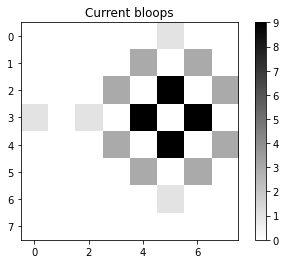

[[ 0.  0.  0.  0.  4.  0.  4.  0.]
 [ 0.  0.  0.  6.  0. 16.  0.  6.]
 [ 4.  0.  4.  0. 24.  0. 24.  0.]
 [ 0.  2.  0. 16.  0. 36.  0. 16.]
 [ 4.  0.  4.  0. 24.  0. 24.  0.]
 [ 0.  0.  0.  6.  0. 16.  0.  6.]
 [ 0.  0.  0.  0.  4.  0.  4.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.]]


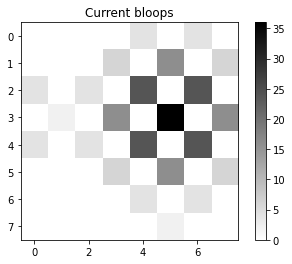

[[  0.   0.   0.  10.   0.  26.   0.  10.]
 [ 10.   0.  10.   0.  50.   0.  50.   0.]
 [  0.  10.   0.  50.   0. 100.   0.  50.]
 [ 26.   0.  26.   0. 100.   0. 100.   0.]
 [  0.  10.   0.  50.   0. 100.   0.  50.]
 [ 10.   0.  10.   0.  50.   0.  50.   0.]
 [  0.   0.   0.  10.   0.  26.   0.  10.]
 [  0.   0.   0.   0.  10.   0.  10.   0.]]


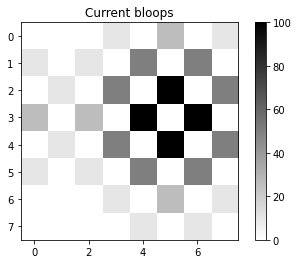

[[ 20.   0.  20.   0.  96.   0.  96.   0.]
 [  0.  30.   0. 120.   0. 226.   0. 120.]
 [ 96.   0.  96.   0. 300.   0. 300.   0.]
 [  0.  72.   0. 226.   0. 400.   0. 226.]
 [ 96.   0.  96.   0. 300.   0. 300.   0.]
 [  0.  30.   0. 120.   0. 226.   0. 120.]
 [ 20.   0.  20.   0.  96.   0.  96.   0.]
 [  0.   0.   0.  30.   0.  72.   0.  30.]]


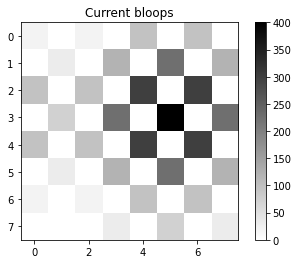

[[   0.   70.    0.  266.    0.  490.    0.  266.]
 [ 266.    0.  266.    0.  742.    0.  742.    0.]
 [   0.  294.    0.  742.    0. 1226.    0.  742.]
 [ 490.    0.  490.    0. 1226.    0. 1226.    0.]
 [   0.  294.    0.  742.    0. 1226.    0.  742.]
 [ 266.    0.  266.    0.  742.    0.  742.    0.]
 [   0.   70.    0.  266.    0.  490.    0.  266.]
 [  70.    0.   70.    0.  294.    0.  294.    0.]]


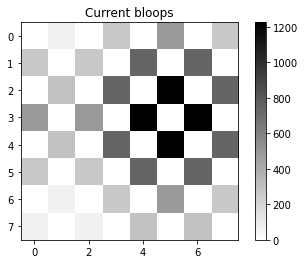

[[ 672.    0.  672.    0. 1792.    0. 1792.    0.]
 [   0.  896.    0. 2016.    0. 3200.    0. 2016.]
 [1792.    0. 1792.    0. 3936.    0. 3936.    0.]
 [   0. 1568.    0. 3200.    0. 4904.    0. 3200.]
 [1792.    0. 1792.    0. 3936.    0. 3936.    0.]
 [   0.  896.    0. 2016.    0. 3200.    0. 2016.]
 [ 672.    0.  672.    0. 1792.    0. 1792.    0.]
 [   0.  280.    0.  896.    0. 1568.    0.  896.]]


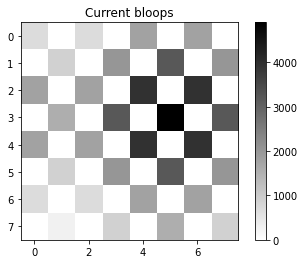

[[    0.  2520.     0.  5376.     0.  8352.     0.  5376.]
 [ 5376.     0.  5376.     0. 10944.     0. 10944.     0.]
 [    0.  6048.     0. 10944.     0. 15976.     0. 10944.]
 [ 8352.     0.  8352.     0. 15976.     0. 15976.     0.]
 [    0.  6048.     0. 10944.     0. 15976.     0. 10944.]
 [ 5376.     0.  5376.     0. 10944.     0. 10944.     0.]
 [    0.  2520.     0.  5376.     0.  8352.     0.  5376.]
 [ 2520.     0.  2520.     0.  6048.     0.  6048.     0.]]


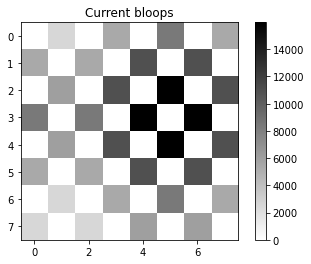

[[15792.     0. 15792.     0. 30720.     0. 30720.     0.]
 [    0. 19320.     0. 32640.     0. 46216.     0. 32640.]
 [30720.     0. 30720.     0. 53840.     0. 53840.     0.]
 [    0. 28800.     0. 46216.     0. 63904.     0. 46216.]
 [30720.     0. 30720.     0. 53840.     0. 53840.     0.]
 [    0. 19320.     0. 32640.     0. 46216.     0. 32640.]
 [15792.     0. 15792.     0. 30720.     0. 30720.     0.]
 [    0. 10080.     0. 19320.     0. 28800.     0. 19320.]]


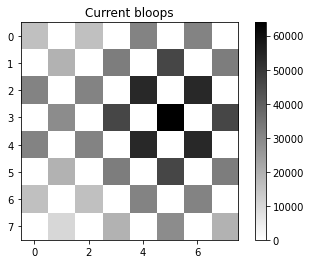

[[     0.  60984.      0.  98472.      0. 136456.      0.  98472.]
 [ 98472.      0.  98472.      0. 163416.      0. 163416.      0.]
 [     0. 109560.      0. 163416.      0. 217800.      0. 163416.]
 [136456.      0. 136456.      0. 217800.      0. 217800.      0.]
 [     0. 109560.      0. 163416.      0. 217800.      0. 163416.]
 [ 98472.      0.  98472.      0. 163416.      0. 163416.      0.]
 [     0.  60984.      0.  98472.      0. 136456.      0.  98472.]
 [ 60984.      0.  60984.      0. 109560.      0. 109560.      0.]]


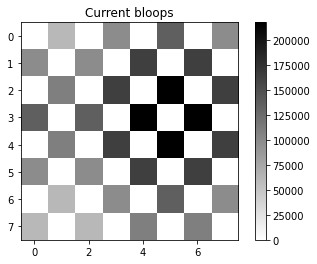

[[318912.      0. 318912.      0. 507904.      0. 507904.      0.]
 [     0. 367488.      0. 523776.      0. 681088.      0. 523776.]
 [507904.      0. 507904.      0. 762432.      0. 762432.      0.]
 [     0. 492032.      0. 681088.      0. 871200.      0. 681088.]
 [507904.      0. 507904.      0. 762432.      0. 762432.      0.]
 [     0. 367488.      0. 523776.      0. 681088.      0. 523776.]
 [318912.      0. 318912.      0. 507904.      0. 507904.      0.]
 [     0. 243936.      0. 367488.      0. 492032.      0. 367488.]]


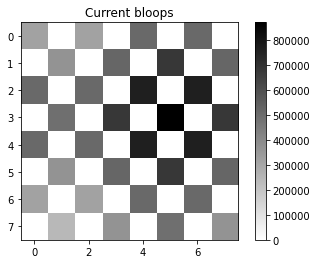

[[      0. 1249248.       0. 1718080.       0. 2188928.       0. 1718080.]
 [1718080.       0. 1718080.       0. 2475200.       0. 2475200.       0.]
 [      0. 1875328.       0. 2475200.       0. 3077152.       0. 2475200.]
 [2188928.       0. 2188928.       0. 3077152.       0. 3077152.       0.]
 [      0. 1875328.       0. 2475200.       0. 3077152.       0. 2475200.]
 [1718080.       0. 1718080.       0. 2475200.       0. 2475200.       0.]
 [      0. 1249248.       0. 1718080.       0. 2188928.       0. 1718080.]
 [1249248.       0. 1249248.       0. 1875328.       0. 1875328.       0.]]


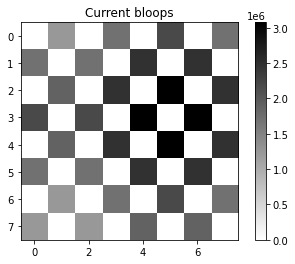

[[ 5934656.        0.  5934656.        0.  8257536.        0.  8257536.
         0.]
 [       0.  6560736.        0.  8386560.        0. 10216480.        0.
   8386560.]
 [ 8257536.        0.  8257536.        0. 11104704.        0. 11104704.
         0.]
 [       0.  8128512.        0. 10216480.        0. 12308608.        0.
  10216480.]
 [ 8257536.        0.  8257536.        0. 11104704.        0. 11104704.
         0.]
 [       0.  6560736.        0.  8386560.        0. 10216480.        0.
   8386560.]
 [ 5934656.        0.  5934656.        0.  8257536.        0.  8257536.
         0.]
 [       0.  4996992.        0.  6560736.        0.  8128512.        0.
   6560736.]]


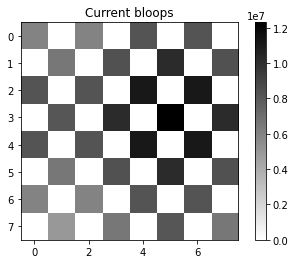

[[       0. 23427040.        0. 29139488.        0. 34860064.        0.
  29139488.]
 [29139488.        0. 29139488.        0. 37965280.        0. 37965280.
         0.]
 [       0. 31204320.        0. 37965280.        0. 44734496.        0.
  37965280.]
 [34860064.        0. 34860064.        0. 44734496.        0. 44734496.
         0.]
 [       0. 31204320.        0. 37965280.        0. 44734496.        0.
  37965280.]
 [29139488.        0. 29139488.        0. 37965280.        0. 37965280.
         0.]
 [       0. 23427040.        0. 29139488.        0. 34860064.        0.
  29139488.]
 [23427040.        0. 23427040.        0. 31204320.        0. 31204320.
         0.]]


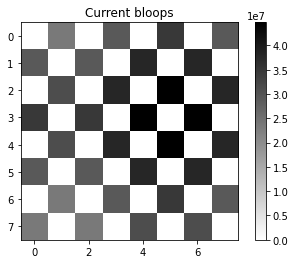

[[1.05133056e+08 0.00000000e+00 1.05133056e+08 0.00000000e+00
  1.33169152e+08 0.00000000e+00 1.33169152e+08 0.00000000e+00]
 [0.00000000e+00 1.12910336e+08 0.00000000e+00 1.34209536e+08
  0.00000000e+00 1.55525120e+08 0.00000000e+00 1.34209536e+08]
 [1.33169152e+08 0.00000000e+00 1.33169152e+08 0.00000000e+00
  1.65399552e+08 0.00000000e+00 1.65399552e+08 0.00000000e+00]
 [0.00000000e+00 1.32128768e+08 0.00000000e+00 1.55525120e+08
  0.00000000e+00 1.78937984e+08 0.00000000e+00 1.55525120e+08]
 [1.33169152e+08 0.00000000e+00 1.33169152e+08 0.00000000e+00
  1.65399552e+08 0.00000000e+00 1.65399552e+08 0.00000000e+00]
 [0.00000000e+00 1.12910336e+08 0.00000000e+00 1.34209536e+08
  0.00000000e+00 1.55525120e+08 0.00000000e+00 1.34209536e+08]
 [1.05133056e+08 0.00000000e+00 1.05133056e+08 0.00000000e+00
  1.33169152e+08 0.00000000e+00 1.33169152e+08 0.00000000e+00]
 [0.00000000e+00 9.37081600e+07 0.00000000e+00 1.12910336e+08
  0.00000000e+00 1.32128768e+08 0.00000000e+00 1.12910336e+08]]

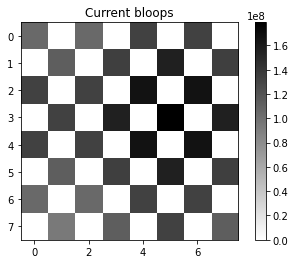

[[0.00000000e+00 4.16884608e+08 0.00000000e+00 4.85422080e+08
  0.00000000e+00 5.53992192e+08 0.00000000e+00 4.85422080e+08]
 [4.85422080e+08 0.00000000e+00 4.85422080e+08 0.00000000e+00
  5.88303360e+08 0.00000000e+00 5.88303360e+08 0.00000000e+00]
 [0.00000000e+00 5.11377408e+08 0.00000000e+00 5.88303360e+08
  0.00000000e+00 6.65262208e+08 0.00000000e+00 5.88303360e+08]
 [5.53992192e+08 0.00000000e+00 5.53992192e+08 0.00000000e+00
  6.65262208e+08 0.00000000e+00 6.65262208e+08 0.00000000e+00]
 [0.00000000e+00 5.11377408e+08 0.00000000e+00 5.88303360e+08
  0.00000000e+00 6.65262208e+08 0.00000000e+00 5.88303360e+08]
 [4.85422080e+08 0.00000000e+00 4.85422080e+08 0.00000000e+00
  5.88303360e+08 0.00000000e+00 5.88303360e+08 0.00000000e+00]
 [0.00000000e+00 4.16884608e+08 0.00000000e+00 4.85422080e+08
  0.00000000e+00 5.53992192e+08 0.00000000e+00 4.85422080e+08]
 [4.16884608e+08 0.00000000e+00 4.16884608e+08 0.00000000e+00
  5.11377408e+08 0.00000000e+00 5.11377408e+08 0.00000000e+00]]

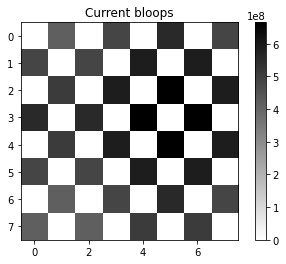

[[1.80461338e+09 0.00000000e+00 1.80461338e+09 0.00000000e+00
  2.13909504e+09 0.00000000e+00 2.13909504e+09 0.00000000e+00]
 [0.00000000e+00 1.89910618e+09 0.00000000e+00 2.14745088e+09
  0.00000000e+00 2.39586112e+09 0.00000000e+00 2.14745088e+09]
 [2.13909504e+09 0.00000000e+00 2.13909504e+09 0.00000000e+00
  2.50713114e+09 0.00000000e+00 2.50713114e+09 0.00000000e+00]
 [0.00000000e+00 2.13073920e+09 0.00000000e+00 2.39586112e+09
  0.00000000e+00 2.66104883e+09 0.00000000e+00 2.39586112e+09]
 [2.13909504e+09 0.00000000e+00 2.13909504e+09 0.00000000e+00
  2.50713114e+09 0.00000000e+00 2.50713114e+09 0.00000000e+00]
 [0.00000000e+00 1.89910618e+09 0.00000000e+00 2.14745088e+09
  0.00000000e+00 2.39586112e+09 0.00000000e+00 2.14745088e+09]
 [1.80461338e+09 0.00000000e+00 1.80461338e+09 0.00000000e+00
  2.13909504e+09 0.00000000e+00 2.13909504e+09 0.00000000e+00]
 [0.00000000e+00 1.66753843e+09 0.00000000e+00 1.89910618e+09
  0.00000000e+00 2.13073920e+09 0.00000000e+00 1.89910618e+09]]

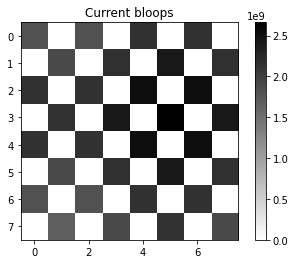

[[0.00000000e+00 7.17587136e+09 0.00000000e+00 7.99026547e+09
  0.00000000e+00 8.80479040e+09 0.00000000e+00 7.99026547e+09]
 [7.99026547e+09 0.00000000e+00 7.99026547e+09 0.00000000e+00
  9.18953818e+09 0.00000000e+00 9.18953818e+09 0.00000000e+00]
 [0.00000000e+00 8.30803546e+09 0.00000000e+00 9.18953818e+09
  0.00000000e+00 1.00711722e+10 0.00000000e+00 9.18953818e+09]
 [8.80479040e+09 0.00000000e+00 8.80479040e+09 0.00000000e+00
  1.00711722e+10 0.00000000e+00 1.00711722e+10 0.00000000e+00]
 [0.00000000e+00 8.30803546e+09 0.00000000e+00 9.18953818e+09
  0.00000000e+00 1.00711722e+10 0.00000000e+00 9.18953818e+09]
 [7.99026547e+09 0.00000000e+00 7.99026547e+09 0.00000000e+00
  9.18953818e+09 0.00000000e+00 9.18953818e+09 0.00000000e+00]
 [0.00000000e+00 7.17587136e+09 0.00000000e+00 7.99026547e+09
  0.00000000e+00 8.80479040e+09 0.00000000e+00 7.99026547e+09]
 [7.17587136e+09 0.00000000e+00 7.17587136e+09 0.00000000e+00
  8.30803546e+09 0.00000000e+00 8.30803546e+09 0.00000000e+00]]

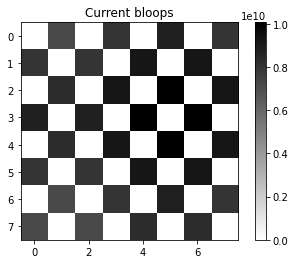

[[3.03322737e+10 0.00000000e+00 3.03322737e+10 0.00000000e+00
  3.42926295e+10 0.00000000e+00 3.42926295e+10 0.00000000e+00]
 [0.00000000e+00 3.14644378e+10 0.00000000e+00 3.43596073e+10
  0.00000000e+00 3.72550390e+10 0.00000000e+00 3.43596073e+10]
 [3.42926295e+10 0.00000000e+00 3.42926295e+10 0.00000000e+00
  3.85214208e+10 0.00000000e+00 3.85214208e+10 0.00000000e+00]
 [0.00000000e+00 3.42256517e+10 0.00000000e+00 3.72550390e+10
  0.00000000e+00 4.02846889e+10 0.00000000e+00 3.72550390e+10]
 [3.42926295e+10 0.00000000e+00 3.42926295e+10 0.00000000e+00
  3.85214208e+10 0.00000000e+00 3.85214208e+10 0.00000000e+00]
 [0.00000000e+00 3.14644378e+10 0.00000000e+00 3.43596073e+10
  0.00000000e+00 3.72550390e+10 0.00000000e+00 3.43596073e+10]
 [3.03322737e+10 0.00000000e+00 3.03322737e+10 0.00000000e+00
  3.42926295e+10 0.00000000e+00 3.42926295e+10 0.00000000e+00]
 [0.00000000e+00 2.87034854e+10 0.00000000e+00 3.14644378e+10
  0.00000000e+00 3.42256517e+10 0.00000000e+00 3.14644378e+10]]

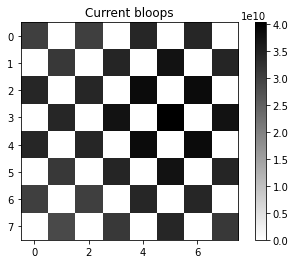

[[0.00000000e+00 1.20832471e+11 0.00000000e+00 1.30448948e+11
  0.00000000e+00 1.40065950e+11 0.00000000e+00 1.30448948e+11]
 [1.30448948e+11 0.00000000e+00 1.30448948e+11 0.00000000e+00
  1.44428697e+11 0.00000000e+00 1.44428697e+11 0.00000000e+00]
 [0.00000000e+00 1.34275348e+11 0.00000000e+00 1.44428697e+11
  0.00000000e+00 1.54582569e+11 0.00000000e+00 1.44428697e+11]
 [1.40065950e+11 0.00000000e+00 1.40065950e+11 0.00000000e+00
  1.54582569e+11 0.00000000e+00 1.54582569e+11 0.00000000e+00]
 [0.00000000e+00 1.34275348e+11 0.00000000e+00 1.44428697e+11
  0.00000000e+00 1.54582569e+11 0.00000000e+00 1.44428697e+11]
 [1.30448948e+11 0.00000000e+00 1.30448948e+11 0.00000000e+00
  1.44428697e+11 0.00000000e+00 1.44428697e+11 0.00000000e+00]
 [0.00000000e+00 1.20832471e+11 0.00000000e+00 1.30448948e+11
  0.00000000e+00 1.40065950e+11 0.00000000e+00 1.30448948e+11]
 [1.20832471e+11 0.00000000e+00 1.20832471e+11 0.00000000e+00
  1.34275348e+11 0.00000000e+00 1.34275348e+11 0.00000000e+00]]

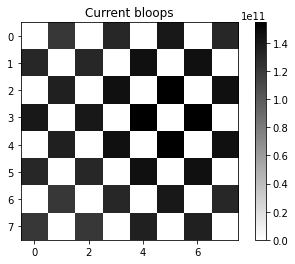

[[5.02562838e+11 0.00000000e+00 5.02562838e+11 0.00000000e+00
  5.49218943e+11 0.00000000e+00 5.49218943e+11 0.00000000e+00]
 [0.00000000e+00 5.16005715e+11 0.00000000e+00 5.49755290e+11
  0.00000000e+00 5.83505912e+11 0.00000000e+00 5.49755290e+11]
 [5.49218943e+11 0.00000000e+00 5.49218943e+11 0.00000000e+00
  5.98022532e+11 0.00000000e+00 5.98022532e+11 0.00000000e+00]
 [0.00000000e+00 5.48682596e+11 0.00000000e+00 5.83505912e+11
  0.00000000e+00 6.18330278e+11 0.00000000e+00 5.83505912e+11]
 [5.49218943e+11 0.00000000e+00 5.49218943e+11 0.00000000e+00
  5.98022532e+11 0.00000000e+00 5.98022532e+11 0.00000000e+00]
 [0.00000000e+00 5.16005715e+11 0.00000000e+00 5.49755290e+11
  0.00000000e+00 5.83505912e+11 0.00000000e+00 5.49755290e+11]
 [5.02562838e+11 0.00000000e+00 5.02562838e+11 0.00000000e+00
  5.49218943e+11 0.00000000e+00 5.49218943e+11 0.00000000e+00]
 [0.00000000e+00 4.83329882e+11 0.00000000e+00 5.16005715e+11
  0.00000000e+00 5.48682596e+11 0.00000000e+00 5.16005715e+11]]

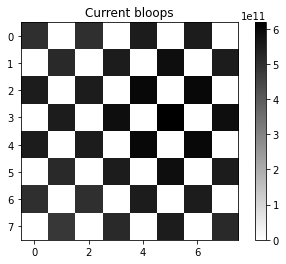

[[0.00000000e+00 2.00446127e+12 0.00000000e+00 2.11754279e+12
  0.00000000e+00 2.23062639e+12 0.00000000e+00 2.11754279e+12]
 [2.11754279e+12 0.00000000e+00 2.11754279e+12 0.00000000e+00
  2.28050268e+12 0.00000000e+00 2.28050268e+12 0.00000000e+00]
 [0.00000000e+00 2.16312620e+12 0.00000000e+00 2.28050268e+12
  0.00000000e+00 2.39788125e+12 0.00000000e+00 2.28050268e+12]
 [2.23062639e+12 0.00000000e+00 2.23062639e+12 0.00000000e+00
  2.39788125e+12 0.00000000e+00 2.39788125e+12 0.00000000e+00]
 [0.00000000e+00 2.16312620e+12 0.00000000e+00 2.28050268e+12
  0.00000000e+00 2.39788125e+12 0.00000000e+00 2.28050268e+12]
 [2.11754279e+12 0.00000000e+00 2.11754279e+12 0.00000000e+00
  2.28050268e+12 0.00000000e+00 2.28050268e+12 0.00000000e+00]
 [0.00000000e+00 2.00446127e+12 0.00000000e+00 2.11754279e+12
  0.00000000e+00 2.23062639e+12 0.00000000e+00 2.11754279e+12]
 [2.00446127e+12 0.00000000e+00 2.00446127e+12 0.00000000e+00
  2.16312620e+12 0.00000000e+00 2.16312620e+12 0.00000000e+00]]

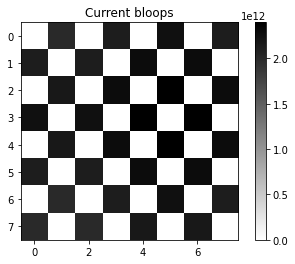

[[8.24400812e+12 0.00000000e+00 8.24400812e+12 0.00000000e+00
  8.79179805e+12 0.00000000e+00 8.79179805e+12 0.00000000e+00]
 [0.00000000e+00 8.40267304e+12 0.00000000e+00 8.79609093e+12
  0.00000000e+00 9.18951300e+12 0.00000000e+00 8.79609093e+12]
 [8.79179805e+12 0.00000000e+00 8.79179805e+12 0.00000000e+00
  9.35676786e+12 0.00000000e+00 9.35676786e+12 0.00000000e+00]
 [0.00000000e+00 8.78750518e+12 0.00000000e+00 9.18951300e+12
  0.00000000e+00 9.59152502e+12 0.00000000e+00 9.18951300e+12]
 [8.79179805e+12 0.00000000e+00 8.79179805e+12 0.00000000e+00
  9.35676786e+12 0.00000000e+00 9.35676786e+12 0.00000000e+00]
 [0.00000000e+00 8.40267304e+12 0.00000000e+00 8.79609093e+12
  0.00000000e+00 9.18951300e+12 0.00000000e+00 8.79609093e+12]
 [8.24400812e+12 0.00000000e+00 8.24400812e+12 0.00000000e+00
  8.79179805e+12 0.00000000e+00 8.79179805e+12 0.00000000e+00]
 [0.00000000e+00 8.01784509e+12 0.00000000e+00 8.40267304e+12
  0.00000000e+00 8.78750518e+12 0.00000000e+00 8.40267304e+12]]

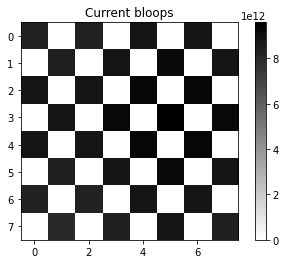

[[0.00000000e+00 3.29085344e+13 0.00000000e+00 3.42345701e+13
  0.00000000e+00 3.55606143e+13 0.00000000e+00 3.42345701e+13]
 [3.42345701e+13 0.00000000e+00 3.42345701e+13 0.00000000e+00
  3.61341698e+13 0.00000000e+00 3.61341698e+13 0.00000000e+00]
 [0.00000000e+00 3.47737743e+13 0.00000000e+00 3.61341698e+13
  0.00000000e+00 3.74945737e+13 0.00000000e+00 3.61341698e+13]
 [3.55606143e+13 0.00000000e+00 3.55606143e+13 0.00000000e+00
  3.74945737e+13 0.00000000e+00 3.74945737e+13 0.00000000e+00]
 [0.00000000e+00 3.47737743e+13 0.00000000e+00 3.61341698e+13
  0.00000000e+00 3.74945737e+13 0.00000000e+00 3.61341698e+13]
 [3.42345701e+13 0.00000000e+00 3.42345701e+13 0.00000000e+00
  3.61341698e+13 0.00000000e+00 3.61341698e+13 0.00000000e+00]
 [0.00000000e+00 3.29085344e+13 0.00000000e+00 3.42345701e+13
  0.00000000e+00 3.55606143e+13 0.00000000e+00 3.42345701e+13]
 [3.29085344e+13 0.00000000e+00 3.29085344e+13 0.00000000e+00
  3.47737743e+13 0.00000000e+00 3.47737743e+13 0.00000000e+00]]

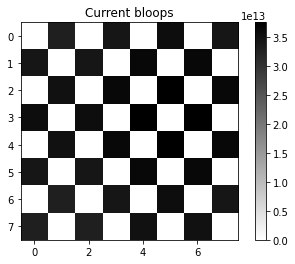

In [150]:
def wrap(i, l):
    if i == -1:
        return l-1
    else:
        return i % l

def grid_step(grid):
    l = len(grid)
    new = np.zeros((l,l))
    
    for i in range(l):
        for j in range(l):
            
            new[i,j] = (
                grid[wrap(i+1, l), wrap(j, l)] +
                grid[wrap(i-1, l), wrap(j, l)] +
                grid[wrap(i, l), wrap(j+1, l)] +
                grid[wrap(i, l), wrap(j-1, l)]
            )
            
    return new


#######

# print start state
g = sg
# print(g)
plt.title("Current bloops")

pixel_plot = plt.imshow(
  g, cmap='binary')

plt.colorbar(pixel_plot)
plt.show(pixel_plot)
    
# iterate    
for i in range(iterations):
    g = grid_step(g)
    
    
    plt.title("Current bloops")
    pixel_plot = plt.imshow(
      g, cmap='binary')

    print(g)
    plt.colorbar(pixel_plot)
    plt.show(pixel_plot)

## Really, because of the wrap-around, you're simulating coming into contact with infinite identical parallel spaces

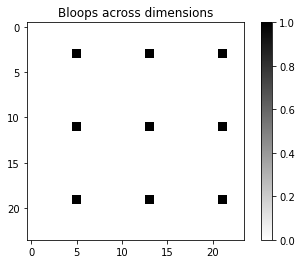

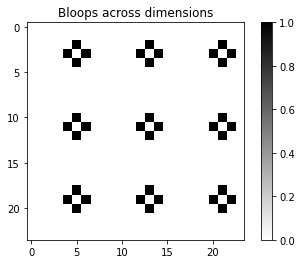

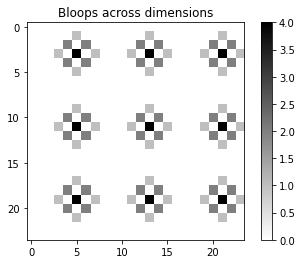

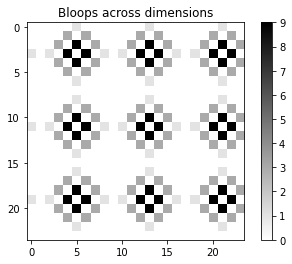

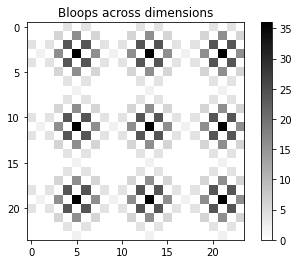

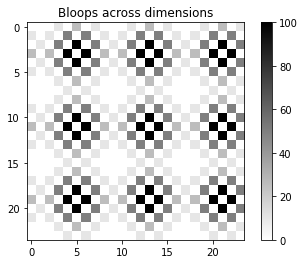

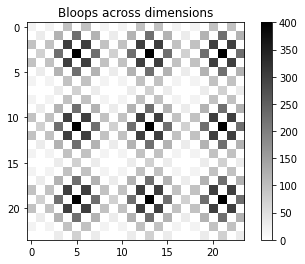

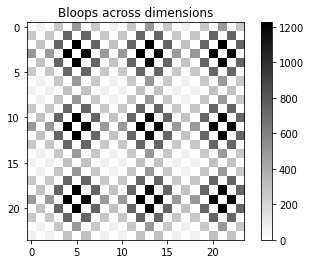

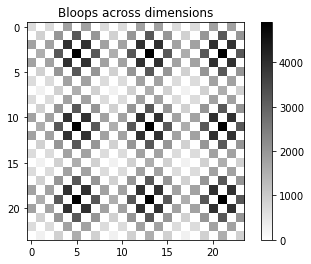

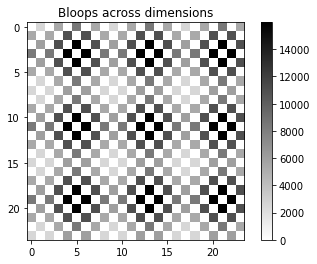

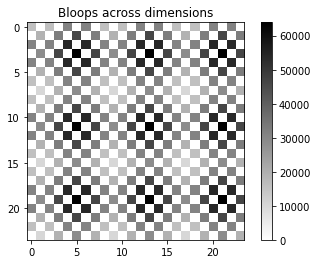

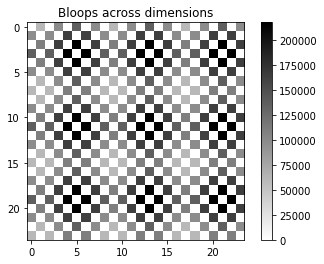

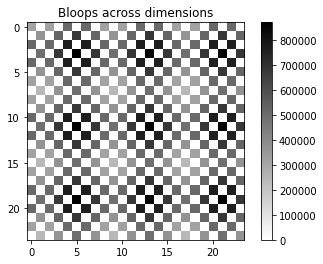

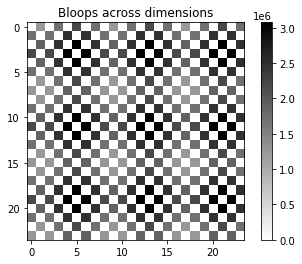

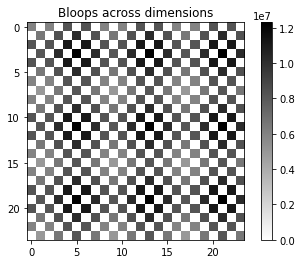

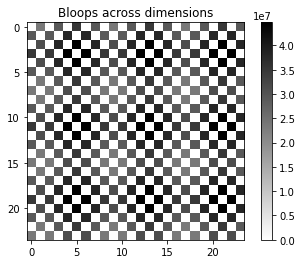

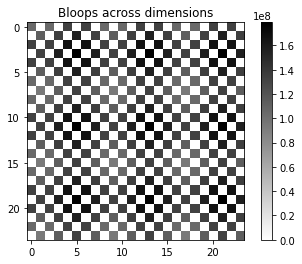

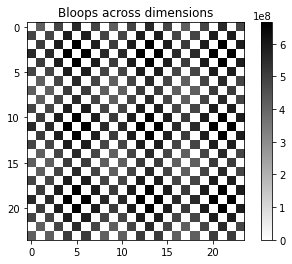

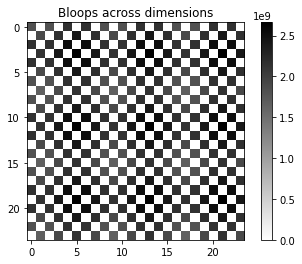

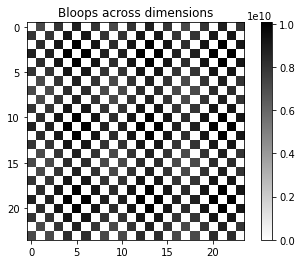

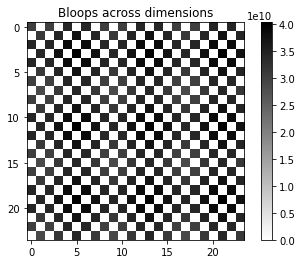

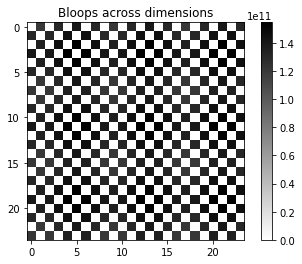

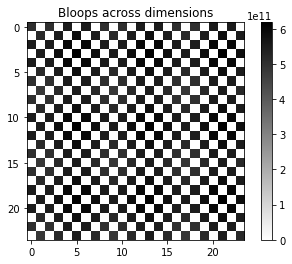

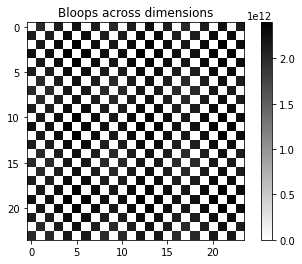

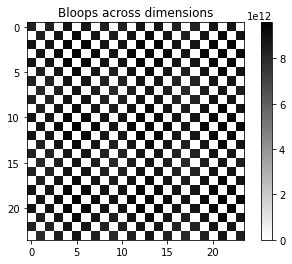

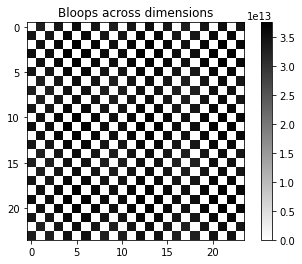

In [148]:
# print start state
multi_grid = multiply_grid(sg, 3)

plt.title("Bloops across dimensions")

pixel_plot = plt.imshow(
  multi_grid, cmap='binary')

plt.colorbar(pixel_plot)
plt.show(pixel_plot)
    
# iterate    
for i in range(iterations):
    multi_grid = grid_step(multi_grid)
    
    
    plt.title("Bloops across dimensions")
    pixel_plot = plt.imshow(
      multi_grid, cmap='binary')

    plt.colorbar(pixel_plot)
    plt.show(pixel_plot)

Because the wrap-around effect produces identical effects to searching infinite identical parallel spaces, searching a subspace of a larger uniform space will have ***exactly*** the same distributions of probabilities as it would if you searched over the entire space.

I have an idea for a novel search method over a large space!!! Simulate a unique pattern over a small subspace with wraparound. Then, use that same pattern, evenly spaced, over the whole area, with a target state that accumulates what enters it. Use a dispersive walk like Hadamard.

--> If there's any method of identifying exactly *when* the pattern within the original small area deviates from expectation, you know how far away your target is from your original area.